### **Name : Rutuja Balasaheb Jagtap**

### **Student ID : 230118658**

### **Course : Machine Learning (CSC8635)**

# **Project 1 attempted : (1) Tabular**

# **FARS Machine Learning Project**

## **INTRODUCTION**

In this project, our focus revolves around the analysis of a US road traffic accident dataset. The primary objectives include gaining a comprehensive understanding of the dataset, addressing imbalances, conducting thorough data preprocessing, implementing diverse machine learning models, fine-tuning their hyperparameters, and concluding with a rigorous evaluation of the chosen models. This systematic approach aims to enhance the overall effectiveness and performance of the machine learning pipeline for predicting accident severity.

#### **PROJECT WORKFLOW**

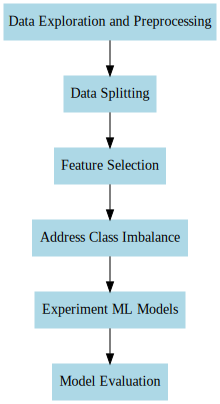

In [ ]:
# @title
import graphviz

# Create a Digraph object
flowchart = graphviz.Digraph(comment='ML Project Pipeline Flowchart', graph_attr={'size': '20,20'})

# Add nodes
flowchart.node('A', 'Data Exploration and Preprocessing', shape='box', style='filled',width='1', height='0.5', color='lightblue')  # Main box
flowchart.node('B', 'Data Splitting', shape='box',style='filled', width='0.5', height='0.5', color='lightblue')  # Child box 1
flowchart.node('D', 'Address Class Imbalance', shape='box',style='filled', color='lightblue')  # Child box 2
flowchart.node('C', 'Feature Selection',style='filled',shape='box', color='lightblue')  # Child box 3
flowchart.node('E', 'Experiment ML Models', shape='box',style='filled', color='lightblue')  # End node
flowchart.node('F', 'Hyperparameter Tuning',style='filled', shape='box', color='lightblue')  # End node
flowchart.node('F', 'Model Evaluation',style='filled', shape='box', color='lightblue')  # End node

# Add edges with arrows
flowchart.edge('A', 'B')
flowchart.edge('B', 'C', dir='forward')
flowchart.edge('C', 'D', dir='forward')
flowchart.edge('D', 'E', dir='forward')
flowchart.edge('E', 'F', dir='forward')

# Save and render the flowchart as a PNG file
flowchart.render(filename='ml_pipeline_flowchart_1', format='png', cleanup=True)

# Display the flowchart
flowchart


## **DATA EXPLORATION AND PREPROCESSING**

In [2]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
# To access google drive folder
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fars dataset has 100968 rows and 30 columns (features).

In [4]:
# Read the dataset csv files

df = pd.read_csv('/content/drive/MyDrive/FARS Project/fars-dataset/fars.csv')
df.shape

(100968, 30)

Column headings are as displayed below.

In [5]:
df.head(5)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


Below information provides a general overview of the dataset structure, types of data it contains, and some insights into the nature of the information captured in each column.

All columns have 100,968 non-null entries, indicating that there are no missing values in any of the columns.

In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

Checking unknown values in the fars dataset.

In [7]:
!pip install colorama
from colorama import Fore, Style

# Check for unknown values in the entire DataFrame
unknown_values = df.isin(['NaN', 'NA', 'None', 'other_placeholder', 'Unknown', 'UNKNOWN'])

# Display the count of unknown values for each column
print("Unknown Values in Each Column:")
print(unknown_values.sum())

# Display the total count of unknown values in the DataFrame
total_unknown = unknown_values.sum().sum()
print(Fore.BLUE + Style.BRIGHT + "\nTotal Unknown Values in the DataFrame:", Style.RESET_ALL, total_unknown)


Unknown Values in Each Column:
CASE_STATE                                 0
AGE                                        0
SEX                                     1655
PERSON_TYPE                                0
SEATING_POSITION                        1768
RESTRAINT_SYSTEM-USE                    9017
AIR_BAG_AVAILABILITY/DEPLOYMENT            0
EJECTION                                 892
EJECTION_PATH                          10007
EXTRICATION                             1209
NON_MOTORIST_LOCATION                     61
POLICE_REPORTED_ALCOHOL_INVOLVEMENT        0
METHOD_ALCOHOL_DETERMINATION               0
ALCOHOL_TEST_TYPE                          0
ALCOHOL_TEST_RESULT                        0
POLICE-REPORTED_DRUG_INVOLVEMENT           0
METHOD_OF_DRUG_DETERMINATION               0
DRUG_TEST_TYPE_(1_of_3)                    0
DRUG_TEST_RESULTS_(1_of_3)                 0
DRUG_TEST_TYPE_(2_of_3)                    0
DRUG_TEST_RESULTS_(2_of_3)                 0
DRUG_TEST_TYPE_(3_of_3) 

There are in total 65,026 unkown values in the whole dataset.

Further, I removed 7964 duplicate entries using the code below, and the new dataset without duplicate entries is stored in a new dataframe 'df_fars'. This allows the old dataframe 'df' to be recalled at any time for future comparisons.

In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
# Count the number of duplicate rows
print(Fore.BLUE + Style.BRIGHT + "\nNumber of duplicate rows:", Style.RESET_ALL, len(duplicate_rows))
# Remove duplicate rows
df_fars = df.drop_duplicates()


Number of duplicate rows:  7964


#### ***Exploratory Data Analysis***

The plot below indicates that more than 41,000 injuries were fatal in US road traffic accident cases, while 15,642 were non-injurious. There are more than 8,000 possible injuries that are not confirmed. Lastly, only 9 died before the accident.

Note: Incapacity injury refers to individuals who were not able to perform regular day-to-day activities post-accident, and vice versa for non-incapacity injuries.

As objective of this project, we have to predict the class label, i.e., the 'Injury Severity' column, using machine learning algorithms. Therefore, I have shown the distribution of data within this column below.

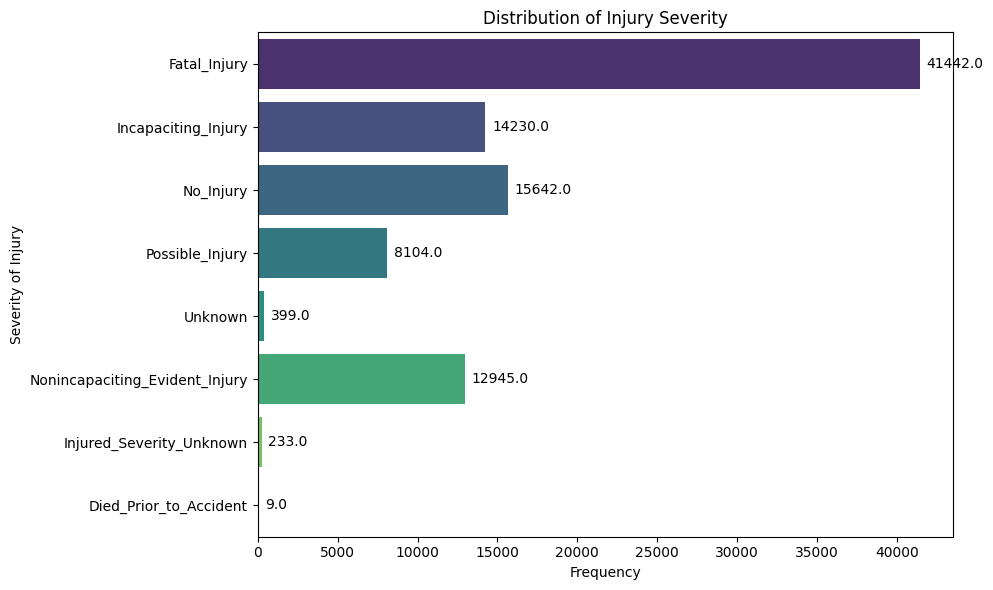

In [9]:
# Visualize the distribution of the target variable with color
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='INJURY_SEVERITY', data=df_fars, palette='viridis', hue='INJURY_SEVERITY', dodge=False)

plt.title('Distribution of Injury Severity')
plt.xlabel("Frequency")
plt.ylabel("Severity of Injury")

# Display frequency on each bar with proper alignment
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points',
                ha='left', va='center')

plt.tight_layout()
plt.show()


The plot below illustrates the correlation between numeric attributes in the FARS data. The columns related to drug test results exhibit a high correlation with each other, indicating that the values in any of these three columns can influence the other two. Additionally, there is a negative correlation between age and alcohol test results

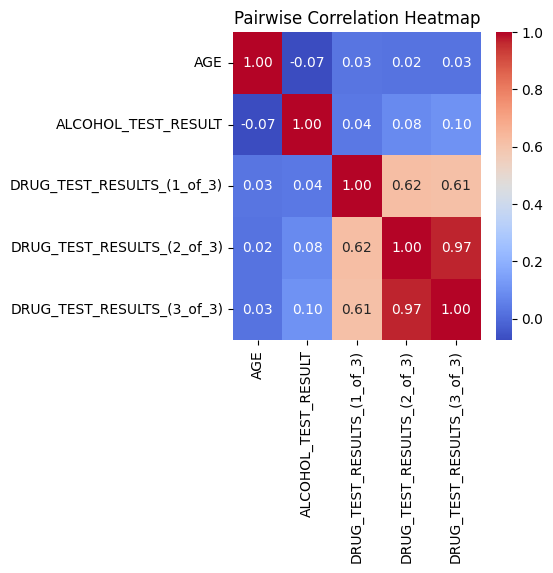

In [10]:
# Pairwise correlation heatmap
numeric_columns = df_fars.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_fars[numeric_columns].corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

***Age Distribution*** -  The frequency of accidents is highest among individuals in the 19-25 age group in US traffic, gradually decreasing for age groups beyond 25 years old. The lowest accident rates are observed among individuals aged 85-90. Accidents are noticeable within the age group of 0-19, with an approximate count of 3000.

***Relationship between age and injury severity*** -
Fatal injuries are prevalent within the age group of 25-55.

Incapacity injuries occurred predominantly in the age group of 20-50, with numerous outliers within this range, including individuals aged 80-100.

Unknown injuries were noted in individuals aged 25 and beyond.

Non-incapacity and possible injuries were observed in the 19-40 age group, with outliers present in the 80 and above age range.

There were minimal fatalities before accidents in the age group of 60-80, which could be attributed to factors such as heart attacks or increased tension among other reasons.

***Gender Distribution*** - In the FARS dataset, the number of males accidents exceeds 60,000, while the count for females surpasses 30,000. Additionally, there are over 1,000 cases where the gender is unidentified. The ratio of females to males is 1:2, underscoring a higher incidence of accidents among males.

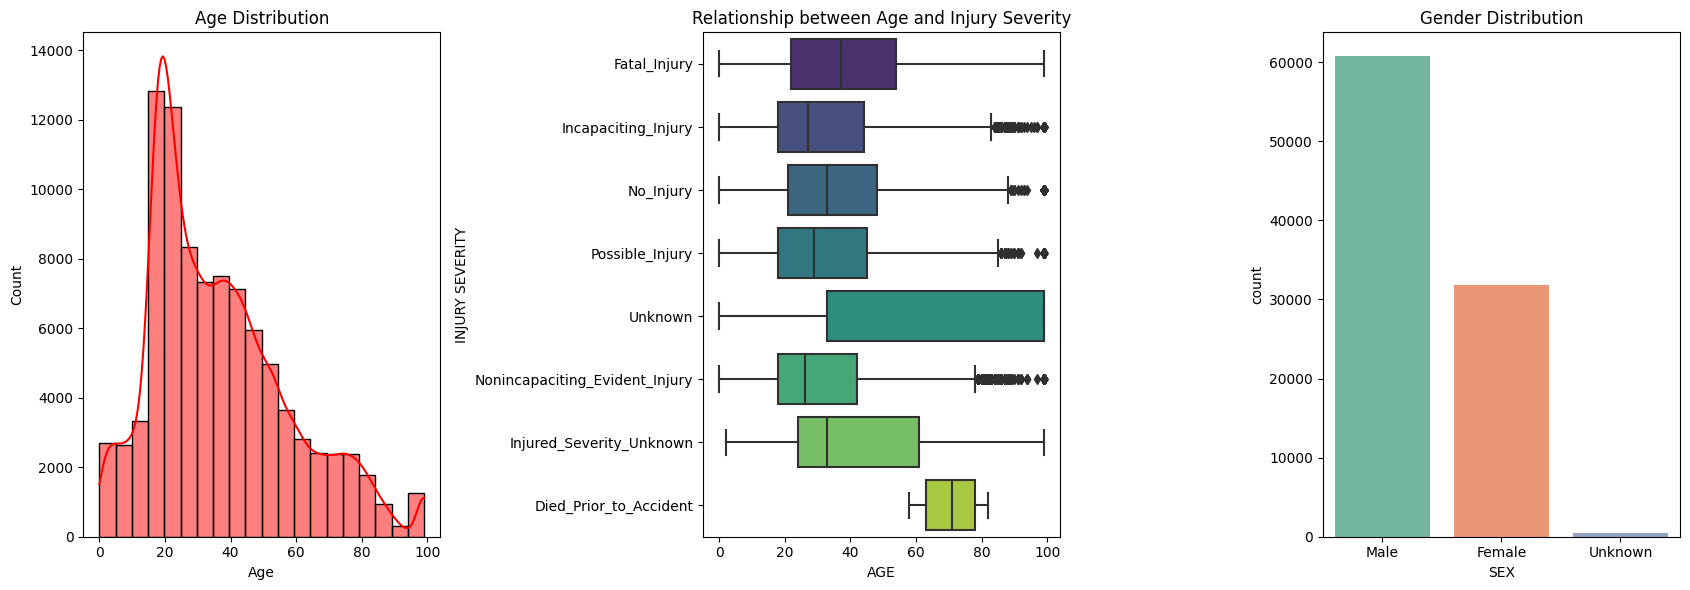

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

# Age distribution
sns.histplot(df_fars['AGE'], bins=20, kde=True, color='red', ax=axs[0])
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')

# Relationship between age and injury severity
sns.boxplot(y='INJURY_SEVERITY', x='AGE', data=df_fars, palette='viridis', ax=axs[1])
axs[1].set_title('Relationship between Age and Injury Severity')
axs[1].set_ylabel('INJURY SEVERITY')

# Count plot for gender distribution
sns.countplot(x='SEX', data=df_fars, palette='Set2', ax=axs[2])
axs[2].set_title('Gender Distribution')

# Adjust spacing between figures
plt.tight_layout()
plt.show()



### ***PREPROCESSING***

Converting categorical columns into numerical values using Label Encoder is essential since machine learning algorithms easily comprehend numeric values rather than English language. The conversion of non-numeric features to numeric representations is necessary for seamless integration into the machine learning algorithms.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df_fars.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column using .loc
for col in categorical_columns:
    df_fars.loc[:, col] = label_encoder.fit_transform(df_fars[col])

df_fars.head()


,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,0,34,1,1,3,7,2,2,9,1,...,0,2,0,5,0,27,29,19,17,1
1,0,20,1,1,3,7,9,2,9,1,...,0,2,0,5,0,27,29,19,17,1
2,0,43,1,1,3,5,4,0,0,0,...,0,2,0,5,0,27,29,19,4,1
3,0,38,0,6,6,5,4,0,0,0,...,0,2,0,6,2,27,29,19,11,2
4,0,50,1,1,3,5,9,0,0,1,...,0,2,0,5,2,27,29,19,4,1


Splitting X and y variables: X consists of all attributes except the target attribute ('INJURY_SEVERITY'), and y represents the target attribute itself('INJURY_SEVERITY'). Further, I am splitting X and Y with test sets as 0.2 ratio, meaning that 80% of the data will be used for training the model, and 20% will be used for evaluating its performance on unknown data.

The random state value 42 ensures reproducibility in the model.

In [14]:
from sklearn.model_selection import train_test_split
# Splitting into features (X) and target variable (y)
X = df_fars.drop(columns=['INJURY_SEVERITY'])  # Features (excluding the target variable)
y = df_fars['INJURY_SEVERITY']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalizing data is a common preprocessing step in machine learning, and the use of StandardScaler specifically refers to standardization. Standardization is a technique that rescales the features to have a mean of 0 and a standard deviation of 1.

Normalization is performed because it helps assign equal importance to all features, improves convergence, and enhances interpretability. Additionally, certain machine learning algorithms, such as SVM and KNN, require standardized data because they are sensitive to the scale of input features.

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[-9.55816441e-01,  4.36736766e-01,  6.95271544e-01, ...,
          3.88612306e-02,  1.22536217e-03, -5.28393539e-01],
        [-3.61116466e-01, -3.26073790e-02,  6.95271544e-01, ...,
          3.88612306e-02,  1.22536217e-03, -2.71653719e+00],
        [ 5.63972385e-01, -1.34677099e+00, -1.37451955e+00, ...,
          3.88612306e-02,  1.22536217e-03,  7.21974265e-01],
        ...,
        [ 1.22475013e+00, -9.24361255e-01,  6.95271544e-01, ...,
          3.88612306e-02,  1.22536217e-03, -5.28393539e-01],
        [-1.55051642e+00, -7.83558012e-01,  6.95271544e-01, ...,
          3.88612306e-02,  1.22536217e-03, -5.28393539e-01],
        [-1.22012754e+00, -1.20596774e+00,  6.95271544e-01, ...,
          3.88612306e-02,  1.22536217e-03, -5.28393539e-01]]),
 array([[ 7.62205710e-01, -1.72224630e+00,  6.95271544e-01, ...,
          3.88612306e-02,  1.22536217e-03, -5.28393539e-01],
        [ 3.53501842e-02,  2.02064694e-01, -1.37451955e+00, ...,
          3.88612306e-02,  1.22536217e

## **FEATURE SELECTION**

**PCA - Principal component analysis**

For deciding the number of principal components (n) to retain in PCA involves balancing the goal of reducing dimensionality with the need to retain sufficient information from the original data.


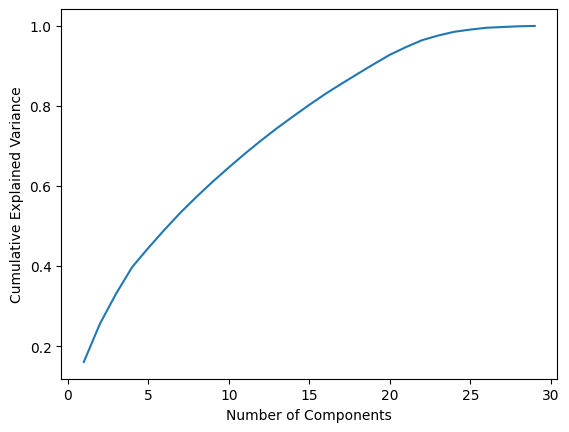

In [16]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In the above plot, the variance becomes stagnant and did not seem to increase significantly at some point between the number of components 20 and 25, approximately at 23. Therefore, we can consider this as the elbow point, and the number of features to retain for training should be 23.

***Feature selection*** - Since we have 29 features, it's necessary to identify the most important features contributing to the classification.

 I have used Recursive Feature Elimination (RFE), a technique that recursively removes features based on model performance. Given that enhancing model performance is the primary objective of the project, I chose this method, which iteratively eliminates unimportant features after fitting all features in the model. Also this methods outperforms classification models and going ahead we will be working on classififcation machine learning models.

 I have chosen 23 features beacuse of principal component analysis we did just above.

In [17]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

#Apply Recursive Feature Elimination (RFE) for feature selection
num_features_to_select = 23
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=num_features_to_select)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)


## **ADDRESSING CLASS IMBALANCE ISSUE**

It's essential to address the issue to ensure that the machine learning model is not biased towards the majority class. I have used SMOTE (Synthetic Minority Over-sampling Technique)oversampling technique to oversample the minority class in the data.

Oversampling is required for this data, as observed in the bar chart during the Exploratory Data Analysis (EDA) phase. Fatal injury cases are the most frequent, while other injury severity categories have comparatively less data classified, therefore we need to balance the class data. Moreover, undersampling reduces the dimensionality of the data and may lead to underperformance of the model, resulting in a poor model.

Both above methods are implemented below.

In [18]:
from imblearn.over_sampling import RandomOverSampler

# Handle class imbalance using oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_selected, y_train)


## **MACHINE LEARNING ALGORITHMS**

As our goal is to categorize data into different classes the 'Injury Severity' column based on the features, I've chosen to employ classification algorithms like **Decision Trees, Random Forests, Logistic Regression and XGBOOST**.

We will build machine learning models and conduct experiments by tuning their hyperparameters. Hyperparameter tuning involves searching a space of values to optimize the model architecture, which can significantly impact the model's success. The correct hyperparameter space enhances performance, while an incorrect or incompatible space can degrade it. Identifying the right set of hyperparameters is crucial and will be determined through experimentation.

For hyperparameter tuning, we will use the random search approach in this project instead of the common grid search technique because it is less time-consuming. This decision is supported by a research study <a href="https://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf?ref=jeremyjordan.me"> (Random Search for Hyper-Parameter Optimization)</a>  that demonstrates significantly higher results than grid method,  referenced [3] . Random search differs from grid search as it doesn't use a predefined set of values for hyperparameters. Instead, it randomly samples values from statistical distributions for each hyperparameter.

Finally, model performance will be assessed using the cross-validation evaluation technique. This is demonstrated in the "evaluate" method below, which employs the "cross_val_score" function to obtain the cross-validation accuracy for the test set. The same function is subsequently invoked and directly applied in later models.

### **1. DECISION TREE CLASSIFIER MODEL**




***Default Decision Tree Model***: It is a simple decision tree classifier without fine-tuning.

***Fine-tuned Decision Tree Model*** :In this version of the decision tree classifier model, I have utilized the random search technique to input various hyperparameter values. It will suggest the best parameter combination that yields good results.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create a default Decision Tree model
default_dt_model = DecisionTreeClassifier(random_state=42)
# Fit the model to the training data
default_dt_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

# Fine-tune the Decision Tree model using RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 5)
}

dt_model = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and the fine-tuned model
best_params_random = random_search.best_params_
fine_tuned_dt_model = random_search.best_estimator_

# Display the best parameters
print(Fore.BLUE + Style.BRIGHT + "Best Hyperparameters :", Style.RESET_ALL, best_params_random)



Best Hyperparameters :  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
    return scores.mean()

# Evaluate the default Decision Tree model
default_dt_accuracy = evaluate_model(default_dt_model, X_test_selected, y_test)

# Evaluate the fine-tuned Decision Tree model
fine_tuned_dt_accuracy = evaluate_model(fine_tuned_dt_model, X_test_selected, y_test)


In [ ]:
import pandas as pd

# Create a DataFrame with the results
results_df_dt = pd.DataFrame({
    'Model': ['Default Decision Tree', 'Fine-Tuned Decision Tree'],
    'Accuracy': [default_dt_accuracy, fine_tuned_dt_accuracy]
})

# Convert accuracy to percentage and format
results_df_dt['Accuracy'] = results_df_dt['Accuracy'].apply(lambda x: "{:.4f}%".format(x * 100))

# Style the DataFrame
style_dt_result = (
    results_df_dt.style
    .hide(axis="index")  # Hide the index
    .set_caption("<b>Decision Tree Model Cross Validation Test Results</b>")
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]}
    ])
)

# Display the styled DataFrame
style_dt_result


Model,Accuracy
Default Decision Tree,73.0498%
Fine-Tuned Decision Tree,76.1249%


***Conclusion*** : Fine-tuning has significantly improved the model performance by 3%. The optimal parameters recommended by the model are:
'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'. The model performs optimally when the decision tree has a maximum depth and employs entropy as the impurity measure (which retains the maximum information gain during node splitting), rather than the default Gini value.

### **2. RANDOM FOREST CLASSIFIER MODEL**

***Default Model:***
This is the default Random Forest classifier model without fine-tuning.

***Fine-Tuned Version 1:***
Here, the Random Forest classifier is fine-tuned using the random search method, incorporating a few basic parameters. We got Best Hyperparameters (Randomized Search): {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True} in this model.

***Fine-Tuned Version 2:*** In this model I have used randomsearch but with more parameters which werent used in previous experiment. The model has not performed as well as before and shown 0.5% decrease in accuracy. Here n estimator or more number trees values were passsed 200 and 250. That suggested that by increase tree count in random forest does not influence model perfromance. All available hyperparameters listed below are used in this model, whereas they were not utilized in the previous model.
Best Hyperparameters (Randomized Search):  {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}


***Fine-Tuned Version 3:*** In this model, I experimented with the grid search method to observe if the model behaves differently and produces better results compared to random search as the two previous hyper-tuned Random Forest models did not yield significantly improved results.
Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
default_rf_model = RandomForestClassifier(random_state=42)
default_rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

**Fine Tuned Version  1**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Specify a smaller parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and the fine-tuned model
best_params_random = random_search.best_params_
fine_tuned_rf_model = random_search.best_estimator_

# Display the best parameters
print(Fore.BLUE + Style.BRIGHT + "Best Hyperparameters (Randomized Search):", Style.RESET_ALL, best_params_random)


Best Hyperparameters (Randomized Search):  {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}


In [ ]:

# Evaluate the default Decision Tree model
default_rf_accuracy = evaluate_model(default_rf_model, X_test_selected, y_test)

# Evaluate the fine-tuned Decision Tree model
fine_tuned_rf_accuracy = evaluate_model(fine_tuned_rf_model, X_test_selected, y_test)

# Display the results
print("Default Random Forest Model Accuracy: {:.4f}%".format(default_rf_accuracy * 100))
print("Fine-Tuned Random Forest Model Accuracy: {:.4f}%".format(fine_tuned_rf_accuracy * 100))

Default Random Forest Model Accuracy: 76.7270%
Fine-Tuned Random Forest Model Accuracy: 77.9313%


**Fine Tuned Version 2**

In [ ]:
param_dist_expanded = {
    'n_estimators': [50, 100, 150, 200, 250],
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'bootstrap': [True, False],
    'max_features': [ 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

random_search_expanded = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist_expanded,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_expanded.fit(X_train_balanced, y_train_balanced)
best_params_random_expanded = random_search_expanded.best_params_
fine_tuned_rf_model_expanded = random_search_expanded.best_estimator_
print(Fore.BLUE + Style.BRIGHT + "Best Hyperparameters (Randomized Search):", Style.RESET_ALL, best_params_random_expanded)




Best Hyperparameters (Randomized Search):  {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}


In [ ]:
# Evaluate the fine-tuned Decision Tree model
fine_tuned_rf_accuracy_2 = evaluate_model(fine_tuned_rf_model_expanded, X_test_selected, y_test)

# Display the results
print("Fine-Tuned Decision Random Forest Model Accuracy: {:.4f}%".format(fine_tuned_rf_accuracy_2 * 100))

Fine-Tuned Decision Random Forest Model Accuracy: 77.2593%


**Fine Tuned Version 3**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Specify a smaller parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['entropy'],
    'max_depth': [5, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf_model_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model_grid, param_grid, cv=4, scoring='accuracy', n_jobs=10)
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and the fine-tuned model
best_params = grid_search.best_params_
fine_tuned_rf_model_grid= grid_search.best_estimator_

# Display the best parameters
print(Fore.BLUE + Style.BRIGHT + "Best Hyperparameters (Grid Search):", Style.RESET_ALL, best_params)


Best Hyperparameters (Grid Search):  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Evaluate the fine-tuned Decision Tree model
fine_tuned_rf_accuracy_1 = evaluate_model(fine_tuned_rf_model_grid, X_test_selected, y_test)

# Display the results
print("Fine-Tuned Decision Random Forest Model Accuracy using Grid Search: {:.4f}%".format(fine_tuned_rf_accuracy_1 * 100))

Fine-Tuned Decision Random Forest Model Accuracy using Grid Search: 78.1517%


In [ ]:
# Create a DataFrame with the results
results_df_rf = pd.DataFrame({
    'Model': ['Default Random Forest', 'Fine-Tuned Random Forest Version 1 (Random Search)', 'Fine-Tuned Random Forest Version 2 (Random Search)', 'Fine-Tuned Random Forest Version (Grid Search)'],
    'Accuracy': [default_rf_accuracy, fine_tuned_rf_accuracy, fine_tuned_rf_accuracy_2, fine_tuned_rf_accuracy_1]
})

# Convert accuracy to percentage and format
results_df_rf['Accuracy'] = results_df_rf['Accuracy'].apply(lambda x: "{:.4f}%".format(x * 100))

# Style the DataFrame
style_rf_result = (
    results_df_rf.style
    .hide(axis="index")  # Corrected method to hide the index
    .set_caption("<b>Random Forest Model Cross Validation Test Results</b>")
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]}
    ])
)

# Display the styled DataFrame
style_rf_result

Model,Accuracy
Default Random Forest,76.7270%
Fine-Tuned Random Forest Version 1 (Random Search),77.9313%
Fine-Tuned Random Forest Version 2 (Random Search),77.2593%
Fine-Tuned Random Forest Version (Grid Search),78.1517%


***Conclusion :***  Apparently, the grid search method performed well, but there is a very small difference of 0.2% between the results obtained by random search in Fine-Tuned Random Forest Version 1 and Fine-Tuned Random Forest Version (Grid Search). This indicates that performance can vary slightly. However, the cross-validation accuracy of the random forest increased by 2% over the three experiments conducted above.

In the second random search experiment, almost all available parameters were included, yet we achieved lower accuracy. This indicates that with fewer parameters, as in Fine-tune version 1, the model's performance can be improved.

The best hyperparameter space is identified as Best Hyperparameters (Grid Search): {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}.

In both the decision tree and random forest, entropy has outperformed Gini impurity. Thus, we can confidently conclude that entropy enhances the model accuracy.

### **3. LOGISTIC REGRESSION MODEL**



***Default Logistic Model:*** This is the basic logistic model trained on the training data.

***Fine-tuned Logistic Model 1:*** In this model, additional parameters such as 'C,' which determines the regularization strength of the model, and L1/L2 regularization were introduced to mitigate overfitting. The maximum iteration parameter was set to 100, 200, and 300. The best model resulted from the combination of hyperparameters: {'C': 0.056411579027100256, 'max_iter': 200, 'penalty': 'l2'}. This model exhibited lower cross-validated accuracy on the test data, i.e., 69.007%, which is lower than the default model. To check for overfitting, the accuracy was also assessed on the training data. As expected, the training score was lower than the test score, indicating that the model has generalized well.

***Fine-tuned Logistic Model 2:*** In this model, a broader range of parameters, such as fit_intercept, solver, class_weight, etc., were explored to enhance model performance. The best performance was achieved with the following parameters: {'C': 0.45606998421703593, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.01}, resulting in an accuracy of 69.0930%.

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Create the default Logistic Regression model
default_logistic_model = LogisticRegression(random_state=42)

# Fit the model to the scaled training data
default_logistic_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

**FINE TUNED LOGISTIC REGRESSION MODEL 1**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': uniform(loc=0, scale=1),  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'max_iter': [100, 200, 300],     # Maximum number of iterations
}

# Create the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and the fine-tuned model
best_params_logistic = random_search.best_params_
fine_tuned_logistic_model = random_search.best_estimator_

# Display the best parameters
print(Fore.BLUE + Style.BRIGHT + "Best Hyperparameters (Randomized Search - Logistic Regression):", Style.RESET_ALL, best_params_logistic)

Best Hyperparameters (Randomized Search - Logistic Regression):  {'C': 0.056411579027100256, 'max_iter': 200, 'penalty': 'l2'}


In [ ]:
# Evaluate the default Decision Tree model
default_lr_accuracy = evaluate_model(default_logistic_model, X_test_selected, y_test)

# Evaluate the fine-tuned Decision Tree model
fine_tuned_lr_accuracy = evaluate_model(fine_tuned_logistic_model, X_test_selected, y_test)

# Display the results
print("Default Logistict Model Accuracy: {:.4f}%".format(default_lr_accuracy * 100))
print("Fine-Tuned Logistic Model Accuracy: {:.4f}%".format(fine_tuned_lr_accuracy * 100))

Default Logistict Model Accuracy: 69.0769%
Fine-Tuned Logistic Model Accuracy: 69.0070%


In [ ]:
# Predict on the training set for both default and fine-tuned models
y_train_pred_default = default_logistic_model.predict(X_train_balanced)
y_train_pred_fine_tuned = fine_tuned_logistic_model.predict(X_train_balanced)

# Calculate training accuracy for both models
train_accuracy_default = accuracy_score(y_train_balanced, y_train_pred_default)
train_accuracy_fine_tuned = accuracy_score(y_train_balanced, y_train_pred_fine_tuned)
print("Training Accuracy - Default Logistic Model: {:.4f}%".format(train_accuracy_default * 100))
print("Training Accuracy - Fine-Tuned Logistic Model: {:.4f}%".format(train_accuracy_fine_tuned * 100))

Training Accuracy - Default Logistic Model: 58.2452%
Training Accuracy - Fine-Tuned Logistic Model: 58.2422%


**FINE TUNED LOGISTIC REGRESSION MODEL 2**

In [ ]:
param_dist_alt = {
    'C': uniform(loc=0, scale=1),        # Regularization strength
    'penalty': ['l1', 'l2'],              # Regularization type
    'max_iter': [100, 200, 300],           # Maximum number of iterations
    'fit_intercept': [True, False],        # Whether to calculate the intercept
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Optimization algorithm
    'class_weight': [None, 'balanced'],   # Weights associated with classes
    'tol': [1e-4, 1e-3, 1e-2],             # Tolerance for stopping criteria
    'dual': [True, False]                 # Dual or primal formulation
}


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_model,
    param_distributions=param_dist_alt,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and the fine-tuned model
best_params_logistic_1 = random_search.best_params_
fine_tuned_logistic_model_1 = random_search.best_estimator_

# Display the best parameters
print(Fore.BLUE + Style.BRIGHT + "Best Hyperparameters (Randomized Search - Logistic Regression):", Style.RESET_ALL, best_params_logistic_1)

Best Hyperparameters (Randomized Search - Logistic Regression):  {'C': 0.45606998421703593, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.01}


In [ ]:
fine_tuned_lr_accuracy_1 = evaluate_model(fine_tuned_logistic_model_1, X_test_selected, y_test)

print("Fine-Tuned Logistic Model Accuracy: {:.4f}%".format(fine_tuned_lr_accuracy_1 * 100))

Fine-Tuned Logistic Model Accuracy: 69.0930%


In [ ]:
y_train_pred_fine_tuned_1 = fine_tuned_logistic_model_1.predict(X_train_balanced)
train_accuracy_fine_tuned_1 = accuracy_score(y_train_balanced, y_train_pred_fine_tuned_1)
print("Training Accuracy - Fine-Tuned Logistic Model: {:.4f}%".format(train_accuracy_fine_tuned_1 * 100))

Training Accuracy - Fine-Tuned Logistic Model: 58.2422%


In [ ]:
# Create a DataFrame with the results
results_df_lr = pd.DataFrame({
    'Model': ['Default Logistic Regression Model', 'Fine-Tuned Logistic Regression Model Version 1 (Random Search)', 'Fine-Tuned Logistic Regression Model Version 2 (Random Search)'],
    'Accuracy': [default_lr_accuracy, fine_tuned_lr_accuracy, fine_tuned_lr_accuracy_1]
})

# Convert accuracy to percentage and format
results_df_lr['Accuracy'] = results_df_lr['Accuracy'].apply(lambda x: "{:.4f}%".format(x * 100))

# Style the DataFrame
style_lr_result = (
    results_df_lr.style
    .hide(axis="index")  # Corrected method to hide the index
    .set_caption("<b>Logistic Regression Model Cross Validation Test Results</b>")
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]}
    ])
)

# Display the styled DataFrame
style_lr_result

Model,Accuracy
Default Logistic Regression Model,69.0769%
Fine-Tuned Logistic Regression Model Version 1 (Random Search),69.0070%
Fine-Tuned Logistic Regression Model Version 2 (Random Search),69.0930%


***Conclusion :***

The fine-tuned Logistic Regression Model 2 has performed the best among all logistic models. However, compared to other machine learning models, logistic regression has performed the poorest, with an accuracy below 70%. Overfitting was not observed. Additionally, a slight increase in the test accuracy of the model is observed from the default version by 0.02%. This model may not be suitable for the tabular dataset we are working on. Despite trying various parameters in fine-tuning, the accuracy remains stagnant.

In both fine-tuned models, the L2 regularizer has been selected, which supports model performance well.

Hyperparamerts of best logistic model are : {'C': 0.45606998421703593, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.01}

Out of all solvers, 'newton-cg' is considered good; this solver is used when dealing with multiclass data, as is the case in our project. The class weight is set to 'none' since we have already balanced the classes through oversampling.


### **4. XGBOOST CLASSIFIER MODEL**

XGBoost, short for Extreme Gradient Boosting, is a powerful and efficient machine learning algorithm based on the gradient boosting framework. It's designed for speed and performance. XGBoost is particularly popular for structured/tabular data and has gained a reputation for its ability to handle large datasets and produce accurate predictions. Therefore, I have decided to use this model than any other common machine learning model.

***Default SVM Model*** : Basic XGBClassifier model

***Fine-Tuned SVM Version:*** In this, hyperparameters are passed to the model using random search.

The XGBoost classifier employs an ensemble approach, combining many trees. It is a slow learner; therefore, some parameters are shared with the decision tree and random forest models.

Parameters include:

learning_rate (or eta): It controls the contribution of each tree to the final prediction. Lower values make the model more robust but require more trees.

n_estimators: The number of boosting rounds or trees to build. A higher value usually results in a more powerful model but may lead to overfitting.

max_depth: Maximum depth of a tree. Higher values can lead to overfitting.

min_child_weight: Minimum sum of instance weight (hessian) needed in a child. It helps control overfitting.

subsample: Fraction of training data to be used for each boosting round. It helps prevent overfitting.

colsample_bytree: Fraction of features to be randomly sampled for each tree. It helps prevent overfitting.

gamma: Minimum loss reduction required to make a further partition on a leaf node. It controls the regularization on the tree.

reg_alpha and reg_lambda: L1 and L2 regularization terms to control the complexity of the individual trees.

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fine-tune the XGBoost model using RandomizedSearchCV
param_dist_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 15),
    'min_child_weight': randint(1, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1.0]
}


xgb_model = XGBClassifier(random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and the fine-tuned model
best_params_random_xgb = random_search_xgb.best_params_
fine_tuned_xgb_model = random_search_xgb.best_estimator_

# Display the best parameters
print(Fore.BLUE + Style.BRIGHT + "Best Hyperparameters for XGBoost:", Style.RESET_ALL, best_params_random_xgb)

# Make predictions using the fine-tuned model
predictions = fine_tuned_xgb_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy:", accuracy)

Best Hyperparameters for XGBoost:  {'colsample_bytree': 0.9, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 202, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.8}
XGBoost Accuracy: 0.7806031933767001


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
    return scores.mean()

# Evaluate the default Decision Tree model
default_xgb_accuracy = evaluate_model(xgb_model, X_test_selected, y_test)

# Evaluate the fine-tuned Decision Tree model
fine_tuned_xgb_accuracy = evaluate_model(fine_tuned_xgb_model, X_test_selected, y_test)

In [27]:
# Create a DataFrame with the results
results_df_xgb = pd.DataFrame({
    'Model': ['Default XGB Classifier Model', 'Fine-Tuned XGB Classifier Model'],
    'Accuracy': [default_xgb_accuracy, fine_tuned_xgb_accuracy]
})

# Convert accuracy to percentage and format
results_df_xgb['Accuracy'] = results_df_xgb['Accuracy'].apply(lambda x: "{:.4f}%".format(x * 100))

# Style the DataFrame
style_lr_result = (
    results_df_xgb.style
    .hide(axis="index")  # Corrected method to hide the index
    .set_caption("<b>XGBOOST Classifier Model Cross Validation Test Results</b>")
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]}
    ])
)

# Display the styled DataFrame
style_lr_result

Model,Accuracy
Default XGB Classifier Model,78.1409%
Fine-Tuned XGB Classifier Model,77.9958%


***Conclusion*** : The fine-tuned version has not yielded good results. The reason could be attributed to inappropriate parameters and inadequate training. But the accuracy is almost the same and not reduced by huge difference.

## **SUMMARY**



Upon examining the results table for the four machine learning models explored earlier, it's evident that the Random Forest model and XGBoost Classifer stands out with commendable performance, achieving approximately 78% cross-validation accuracy on the test set. In contrast, logistic regression did not yield satisfactory accuracy. Notably, fine-tuning played a pivotal role in enhancing the model's performance during the experimentation process.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------



#**Project 2 attempted : (3) Text**

#**Sentiment Analysis of Airline Tweets**

**INTRODUCTION**

This machine learning project focuses on the sentiment analysis of airline-related tweets. The dataset encompasses tweets expressing positive, negative, and neutral sentiments, providing a comprehensive overview of user emotions regarding airline experiences. The goal is to deploy various machine learning models for effective sentiment classification, offering airlines valuable insights into customer satisfaction, concerns, and prevailing sentiment trends. By harnessing natural language processing techniques, the project aims to optimize the analysis of textual data, enabling airlines to respond proactively to customer feedback and enhance overall service quality.



**OBJECTIVE**

The primary objective is to develop a comprehensive machine learning pipeline including Exploratory Data Analysis (EDA), data preprocessing (natural language processing - NLP techniques), and the training of both shallow and deep classifiers, followed by an ensemble approach.
The project aims to thoroughly compare the performance of each model on both validation and test datasets, utilizing performance metrics to assess accuracy, precision, recall, and primarily F1 score. Additionally, the objective involves fine-tuning the models to optimize their performance and, ultimately, providing a detailed evaluation of each model's effectiveness in capturing and categorizing sentiments expressed in airline tweets.




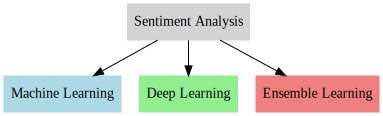

In [ ]:
# @title
import graphviz

# Create a Digraph object
flowchart = graphviz.Digraph(comment='Sentiment Analysis Flowchart')

# Add nodes
flowchart.node('A', 'Sentiment Analysis', shape='rect', style='filled', color='lightgray')  # Main box
flowchart.node('C1', 'Machine Learning', shape='rect',style='filled', color='lightblue')  # Child box 1
flowchart.node('C2', 'Deep Learning', shape='rect',style='filled', color='lightgreen')  # Child box 2
flowchart.node('C3', 'Ensemble Learning', shape='rect',style='filled', color='lightcoral')  # Child box 3

# Add edges with arrows
flowchart.edge('A', 'C1', dir='forward')
flowchart.edge('A', 'C2', dir='forward')
flowchart.edge('A', 'C3', dir='forward')

# Save and render the flowchart as a PNG file
flowchart.render(filename='sentiment_analysis_flowchart', format='png', cleanup=True)

# Display the flowchart
flowchart



*PROJECT WORKFLOW - MACHINE LEARNING PIPELINE*

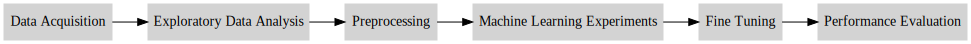

In [ ]:
# @title
import graphviz

# Create a Digraph object
flowchart2 = graphviz.Digraph(comment='ML Project Pipeline Flowchart', graph_attr={'size': '30,30','rankdir': 'LR'})

# Add nodes
flowchart2.node('A', 'Data Acquisition', shape='box', style='filled',width='1', height='0.5', color='lightgray')  # Main box
flowchart2.node('B', 'Exploratory Data Analysis', shape='box',style='filled', width='0.5', height='0.5', color='lightgray')  # Child box 1
flowchart2.node('C', 'Preprocessing', shape='box',style='filled', color='lightgray')  # Child box 2
flowchart2.node('D', 'Machine Learning Experiments',style='filled',shape='box', color='lightgray')  # Child box 3
flowchart2.node('E', 'Fine Tuning', shape='box',style='filled', color='lightgray')  # End node
flowchart2.node('F', 'Performance Evaluation',style='filled', shape='box', color='lightgray')  # End node

# Add edges with arrows
flowchart2.edge('A', 'B')
flowchart2.edge('B', 'C', dir='forward')
flowchart2.edge('C', 'D', dir='forward')
flowchart2.edge('D', 'E', dir='forward')
flowchart2.edge('E', 'F', dir='forward')

# Save and render the flowchart as a PNG file
flowchart2.render(filename='ml_pipeline_flowchart', format='png', cleanup=True)

# Display the flowchart
flowchart2


**DATA UNDERSTANDING**

The dataset comprises three separate files for training, validation, and testing, each in Excel format. These files consist of three columns: "tweet id" representing the unique identifier of the Twitter user, "text" containing the actual tweets shared by users, and "airline sentiment," a categorical column with three values. The sentiment labels are categorized as "positive" for tweets conveying positive sentiments, "negative" for those expressing negative sentiments, and "neutral" for tweets that are neither positively nor negatively inclined, representing general statements without evident emotions. The objective is to leverage this structured data for training, validating, and testing machine learning models designed to accurately classify sentiments associated with airline-related tweets.


In [28]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [29]:
# To access google drive folder
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Each data file is read and stored in a new DataFrame. 'df_tweets_train' contains training data, 'df_tweets_test' contains testing data, and 'df_tweets_val' contains validation data.

In [30]:
# Read the dataset csv files

df_tweets_train = pd.read_csv('/content/drive/MyDrive/Airline Tweets Sentiment Analysis Project/Tweets_train (2).csv')
df_tweets_test = pd.read_csv('/content/drive/MyDrive/Airline Tweets Sentiment Analysis Project/Tweets_test (1) (2).csv', encoding = 'ISO-8859-1')
df_tweets_val = pd.read_csv('/content/drive/MyDrive/Airline Tweets Sentiment Analysis Project/Tweets_dev (1).csv')

## **EXPLORATORY DATA ANALYSIS**

* *DATA QUALITY AND PREPARATION*

All three datasets share the same number of columns as shown below. The training set has more data to adequately train the machine learning model for improved accuracy. The validation set evaluates the performance of the trained model, while the test data serves as completely unknown data to assess the model's competency on unfamiliar information.

In [31]:
# Display the shape of each dataset

print("Shape of Tweets Train:", df_tweets_train.shape)
print("Shape of Tweets Test:", df_tweets_test.shape)
print("Shape of Tweets Dev:", df_tweets_val.shape)

Shape of Tweets Train: (11858, 3)
Shape of Tweets Test: (1464, 3)
Shape of Tweets Dev: (1318, 3)


In [32]:
# Display the columns of each dataset

print("\nColumns of Tweets Train:")
print(df_tweets_train.columns)

print("\nColumns of Tweets Test:")
print(df_tweets_test.columns)

print("\nColumns of Tweets Dev:")
print(df_tweets_val.columns)


Columns of Tweets Train:
Index(['tweet_id', 'text', 'airline_sentiment'], dtype='object')

Columns of Tweets Test:
Index(['tweet_id', 'text', 'airline_sentiment'], dtype='object')

Columns of Tweets Dev:
Index(['tweet_id', 'text', 'airline_sentiment'], dtype='object')



Before performing Exploratory Data Analysis (EDA) on the data, it is crucial to ensure its cleanliness. Conducting EDA directly may lead to inaccurate results in the analysis report. Therefore, I executed some data quality checks like missing values and duplicates. The results below indicate the absence of missing values, but some duplicated values were discovered in all three datasets. I have removed the duplicates.

In [33]:
# Check for missing values

print("\nMissing values in Tweets Train:")
print(df_tweets_train.isnull().sum())

print("\nMissing values in Tweets Test:")
print(df_tweets_test.isnull().sum())

print("Missing values in Tweets Dev:")
print(df_tweets_val.isnull().sum())



Missing values in Tweets Train:
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

Missing values in Tweets Test:
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64
Missing values in Tweets Dev:
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64


In [34]:
# Check for duplicates
print("Duplicates in Tweets Train:", df_tweets_train.duplicated().sum())
print("Duplicates in Tweets Test:", df_tweets_test.duplicated().sum())
print("Duplicates in Tweets Dev:", df_tweets_val.duplicated().sum())

# Remove duplicates
df_tweets_train = df_tweets_train.drop_duplicates()
df_tweets_test = df_tweets_test.drop_duplicates()
df_tweets_val = df_tweets_val.drop_duplicates()


Duplicates in Tweets Train: 91
Duplicates in Tweets Test: 9
Duplicates in Tweets Dev: 1


###  ***ANALYSIS***

**1. Frequency of distribution of sentiments across dataset**

Below, the bar chart representation illustrates that the ratio of positive, negative, and neutral sentiments are nearly identical across all three sets. This ensures that unbiased data is being provided to machine learning model which in turn will ensure to give unbiased results. Additionally, highly negative sentiments are more in tweets followed by neutral and positive.

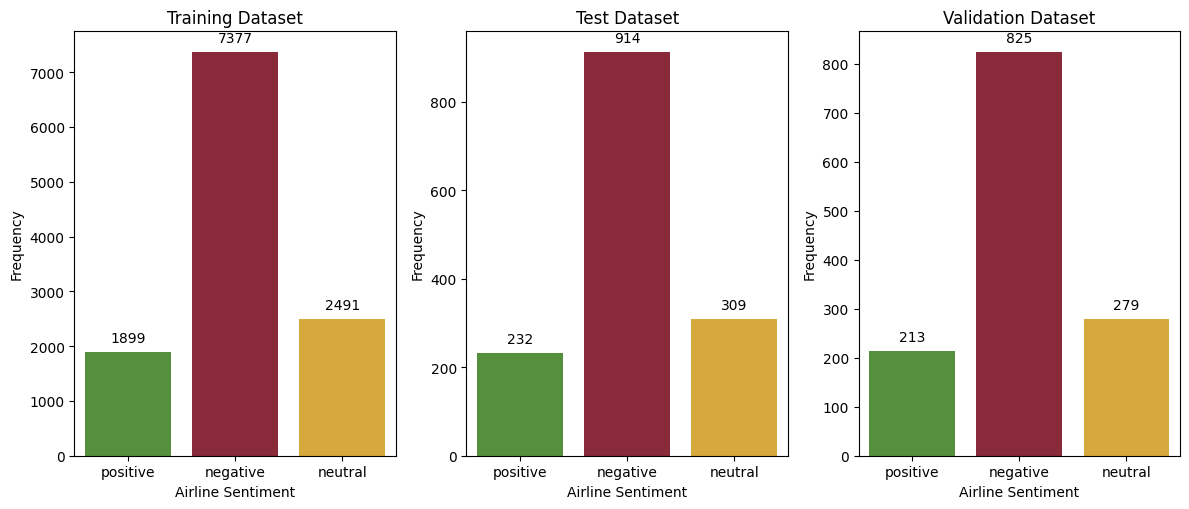

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique values from 'airline_sentiment' column in the training dataset
sentiment_order = df_tweets_train['airline_sentiment'].unique()

# Define a custom color palette for each sentiment
color_palette = {'positive': '#509E2F', 'negative': '#971B2F', 'neutral': '#F0B323'}

# Set the size of the entire figure
fig, axes = plt.subplots(1, 3, figsize=(12, 5.2))

# Plot for training dataset
sns.countplot(x='airline_sentiment', data=df_tweets_train, hue='airline_sentiment',
              palette=color_palette, order=sentiment_order, ax=axes[0], legend=False)
axes[0].set_title('Training Dataset')
axes[0].set_xlabel('Airline Sentiment')
axes[0].set_ylabel('Frequency')

# Annotate each bar with its count in the training dataset
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot for test dataset
sns.countplot(x='airline_sentiment', data=df_tweets_test, hue='airline_sentiment',
              palette=color_palette, order=sentiment_order, ax=axes[1], legend=False)
axes[1].set_title('Test Dataset')
axes[1].set_xlabel('Airline Sentiment')
axes[1].set_ylabel('Frequency')

# Annotate each bar with its count in the test dataset
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot for validation dataset
sns.countplot(x='airline_sentiment', data=df_tweets_val, hue='airline_sentiment',
              palette=color_palette, order=sentiment_order, ax=axes[2], legend=False)
axes[2].set_title('Validation Dataset')
axes[2].set_xlabel('Airline Sentiment')
axes[2].set_ylabel('Frequency')

# Annotate each bar with its count in the validation dataset
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**2. Word Cloud for positive and negative sentiments**

The word cloud below showcases prominently highlighted words in a larger font, while less emphasized ones are displayed in smaller fonts. I have created separate word clouds for negatively classified tweets and positively classified tweets. Given the prevalence of noun words in the tweets, I opted to exclude them and focus solely on displaying adjectives, as they play a crucial role in determining whether a sentence is negative or positive.
There are few outliers i.e unexpected negative words also used in positively categorised data and vice-versa eg. words like Late, Cancelled etc.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


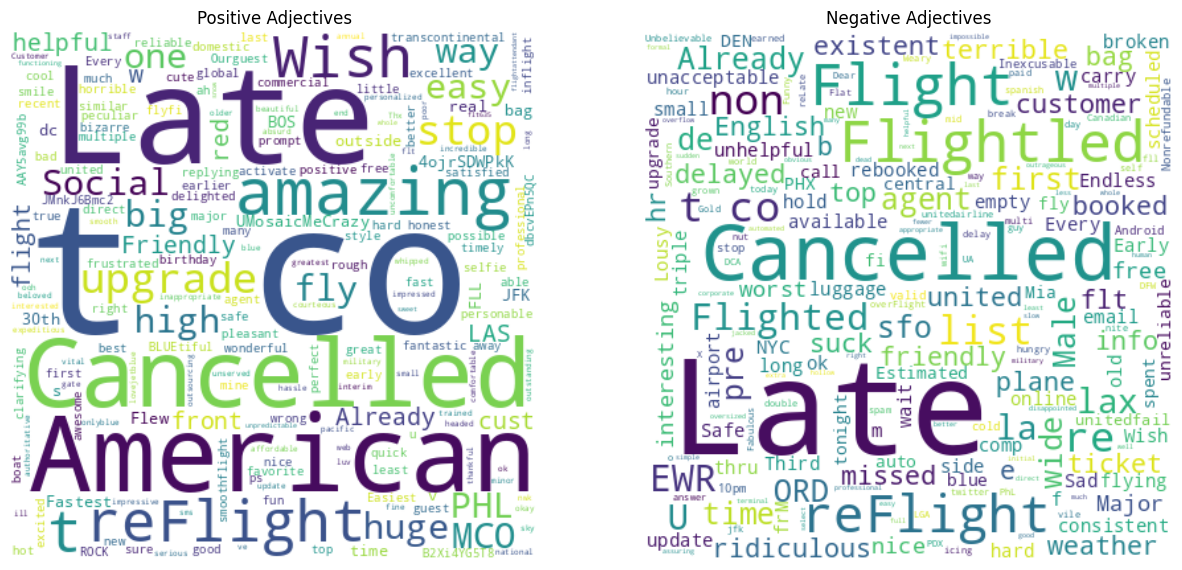

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to filter adjectives and remove duplicates
def filter_adjectives(text, unique_words=set()):
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    adjectives = [word for word, pos in tagged_words if pos.startswith('JJ') and word.lower() not in unique_words]
    unique_words.update(adjectives)
    return ' '.join(adjectives)

# Positive tweets
positive_tweets = df_tweets_train[df_tweets_train['airline_sentiment'] == 'positive']['text']
unique_words_positive = set()
positive_adjectives_text = ' '.join(filter_adjectives(tweet, unique_words_positive) for tweet in positive_tweets)

# Negative tweets
negative_tweets = df_tweets_train[df_tweets_train['airline_sentiment'] == 'negative']['text']
unique_words_negative = set()
negative_adjectives_text = ' '.join(filter_adjectives(tweet, unique_words_negative) for tweet in negative_tweets)

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Word Cloud for Positive Adjectives
wordcloud_positive = WordCloud(width=400, height=400, background_color='white').generate(positive_adjectives_text)
axs[0].imshow(wordcloud_positive, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Positive Adjectives')

# Word Cloud for Negative Adjectives
wordcloud_negative = WordCloud(width=400, height=400, background_color='white').generate(negative_adjectives_text)
axs[1].imshow(wordcloud_negative, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Negative Adjectives')

plt.show()


**3. Frequency of distribution of sentiments across airlines**

I observed that in all the tweets, the airlines are mentioned at the beginning of the sentence. To capture this information, I extracted and created a new column named 'airline' in the training dataset to store the extracted airline names. To maintain data integrity, I refrained from altering the validation and test datasets. With over 11,000 tweets in the training data, it provides a substantial dataset for understanding user sentiments.

Additionally, I noticed variations in the text format of the same airlines (e.g., '@JetBlue' and '@jetBlue'). To address this, I normalized the airline names by converting them to uppercase letters and stored them in the 'airline_update' column, ensuring uniformity in airline name texts. I excluded instances where airlines were tagged in the middle of sentences to reduce redundancy.

The dataset contains 22 unique airlines, with 'United' and 'USAirways' being the most frequently mentioned, followed by 'AmericanAir,' 'JetBlue,' and 'Virgin America.'

In [ ]:
# New column 'airline' by extracting the starting word after '@' symbol
df_tweets_train['airline'] = df_tweets_train['text'].str.extract(r'@(\w+)')

# Converting 'airline' column to uppercase
df_tweets_train['airline_update'] = df_tweets_train['airline'].str.upper()

df_tweets_train

,tweet_id,text,airline_sentiment,airline,airline_update
0,569179849518161920,@united you're good. Thank you!,positive,united,UNITED
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative,AmericanAir,AMERICANAIR
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive,JetBlue,JETBLUE
3,569525116725567491,@USAirways The automated message isn't helpful...,negative,USAirways,USAIRWAYS
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive,JetBlue,JETBLUE
...,...,...,...,...,...
11853,570123872168574976,"@AmericanAir will not help us on the phone, at...",negative,AmericanAir,AMERICANAIR
11854,570063683256242177,@USAirways has the worst customer service line...,negative,USAirways,USAIRWAYS
11855,568032524749942784,@USAirways grades for this trip:\n\nFlight tim...,negative,USAirways,USAIRWAYS
11856,569705813142409217,@united Thanks for the vague canned response t...,negative,united,UNITED


In [35]:
import re
# New column 'airline' by extracting the starting word after '@' symbol
df_tweets_train['airline'] = df_tweets_train['text'].apply(lambda x: re.search(r'^@(\w+)', x).group(1) if re.search(r'^@(\w+)', x) else None)

# Converting 'airline' column to uppercase using .loc
df_tweets_train.loc[:, 'airline_update'] = df_tweets_train['airline'].str.upper()


In [36]:
# Count the number of unique airlines mentioned in tweets

num_unique_airlines = df_tweets_train['airline_update'].nunique()

print("Number of unique airlines tagged in tweets:", num_unique_airlines)


Number of unique airlines tagged in tweets: 22


In [37]:
unique_airline_counts = df_tweets_train['airline_update'].value_counts()
unique_airline_counts = unique_airline_counts.sort_index()

print("List of airlines :-")
print(unique_airline_counts)


List of airlines :-
ALBERTBREER           1
AMERICANAIR        2092
ANDREWFALLIS          1
CATFOODBEERGLUE       1
DELTAASSIST           1
DJEVOLUTIONHD         1
EATGREGEAT            1
HILLACONLIN           1
JETBLUE            1628
LINDASWC              1
NRHODES85             1
ODS1819               1
SARAHPOMPEI           1
SB5551                1
SCM1133               1
SHANNONWOODWARD       1
SOUTHWESTAIR       1933
TIMBENNETTG3          1
UNITED             3015
USAIRWAYS          2291
VANESSAANNZ           1
VIRGINAMERICA       401
Name: airline_update, dtype: int64


I created a colored clustered bar chart illustrating the classification of all airlines based on sentiments. Southwest Airlines received the most i.e 500 positive feedback, followed by JetBlue and United Airlines. United has received the most negative sentiments, surpassing a value of 2000. The remaining airlines appear to have minimal representation, each having just one tag.

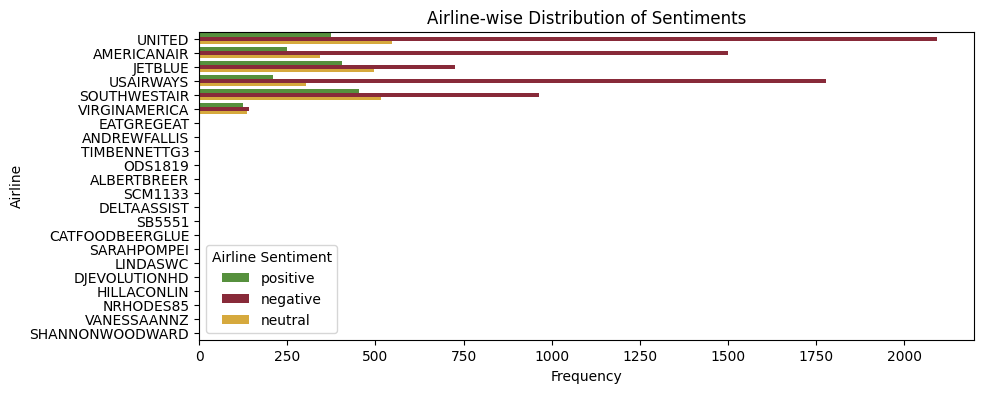

In [ ]:

# Set the size of the entire figure
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

# Plot the distribution of sentiment counts grouped by airline
sns.countplot(y='airline_update', hue='airline_sentiment', data=df_tweets_train, palette=color_palette)

# Set plot title and labels
plt.title('Airline-wise Distribution of Sentiments')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.legend(title='Airline Sentiment')

# Show the plot
plt.show()

**4. Polarity and Subjectivity of Tweets across airlines**

Although a separate column for sentiment classification exists, I attempted to directly assess its accuracy by studying the degree of positivity, negativity, or neutrality in a piece of text from the 'text' column using polarity. Additionally, I examined the degree to which the text expresses personal opinions, feelings, or biases using subjectivity. Both of these implimentation utilize inbuilt functions from the TextBlob library.

Polarity is a floating-point number ranging from -1 to 1, where -1 denotes negative sentiment and +1 indicates positive sentiments. Subjectivity, another floating-point value, falls within the range of 0 to 1. Sentences with higher subjectivity values typically express personal opinions, emotions, or judgments.

Below is polar bar representaion to display subjectivity and polarity of airline tweets. Degree of polarity is

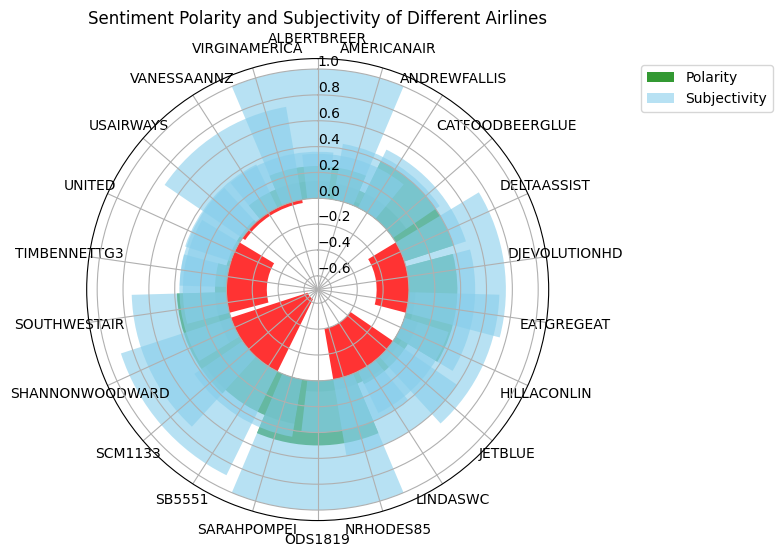

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob

# Sample data
tweets = df_tweets_train['text']

# Function to calculate sentiment polarity using TextBlob
def calculate_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to calculate sentiment subjectivity using TextBlob
def calculate_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

# Calculate average sentiment polarity and subjectivity for each airline
average_polarity = df_tweets_train.groupby('airline_update')['text'].apply(lambda x: x.apply(calculate_polarity).mean())
average_subjectivity = df_tweets_train.groupby('airline_update')['text'].apply(lambda x: x.apply(calculate_subjectivity).mean())

# Remove rows with missing values
average_polarity = average_polarity.dropna()
average_subjectivity = average_subjectivity.dropna()

# Sample data
airlines = average_polarity.index

# Map colors based on sentiment polarity
colors_polarity = np.where(average_polarity < 0, 'red', np.where(average_polarity == 0, 'yellow', 'green'))

# Create a polar plot for sentiment polarity and subjectivity
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Plotting polar bars for each airline
theta = 2 * np.pi * np.linspace(0, 1, len(airlines), endpoint=False)
bars_polarity = ax.bar(theta, average_polarity, align='center', alpha=0.8, color=colors_polarity, label='Polarity')
bars_subjectivity = ax.bar(theta, average_subjectivity, align='center', alpha=0.6, color='skyblue', label='Subjectivity')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_xticks(theta)
ax.set_xticklabels(airlines)
ax.xaxis.grid(True)
ax.set_title('Sentiment Polarity and Subjectivity of Different Airlines')
ax.legend(loc='upper right')


# Move the legends outside the subplots
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()


In the above plot, Virgin America, Albert Breer, American Air, SarahPopei ODs1819, NRHODES85 airlines exhibit text with high subjectivity. Shannonwoodward, SCM1133, SB5551 have shown a significantly negative polarity marked in red, almost reaching a -0.6 value. This indicates that the associated tweet texts contain negative words. SaragPompei, ODS1819, and NHRODES85 exhibit a high positive polarity, highlighted in a green shade, representing the presence of positive words in the associated tweets about these airlines.

## **DATA PREPROCESSING**

Preprocessing data is necessary before directly feeding it into the model for training because unnecessary junk words are removed, and only important words contributing to learning are considered. This, in turn, affects model performance. There are several techniques for text preprocessing that I have implemented:

1. Text Normalization:
  * By converting all text both upper and lower case, words and letters are standardized to lowercase, ensuring text consistency and ease of text comparison.

2. Eliminating Redundancy:
  * Airlines tagged with the @ symbol are also removed, as we are not concerned about which airline is affected; we only want the model to learn sentiments in the text. Moreover, a separate column for airlines is maintained in the dataset, making this word no longer necessary in the text column.

3. Handling Numeric, Special Tokens and URLS:
  * By removing all non-alphabetic characters like numbers and special characters, as they do not contribute to analyzing sentiments.
  * Identified and standardized special tokens by removing URLs.

4. Handling Language Variations:
  * I performed a language check on the text data and found that all data is in English; therefore, no changes were required in this part.

5. Stemming and Lemmatization:
  * These two techniques are highly utilized in text preprocessing.
  The stemming algorithm reduces any word to its root form (e.g., running to run).
  The lemmatization algorithm helps reduce words to their base or dictionary form (e.g., better to good).
  Both of these are implemented using the Natural Language Toolkit (NLTK) library.

6. Removing Stop Words:
  * This is another widely used text preprocessing technique to remove the most common words like "on," "the," "of," "in," etc., in order to focus on other meaningful content in the text data.

7. Vectorization using TF-IDF (Term Frequency-Inverse Document Frequency):
  * TF-IDF is used to convert a collection of text documents into numerical feature vectors, allowing machine learning algorithms to operate on them.
  * X_train, X_val, X_test are vectorised using existing scikit learn library.
  * max_features is set to 5000, which aids in dimensionality reduction, memory and resource efficiency, and model generalization.
  
NOTE : A separate "processed_text" column is created to store processed text data, providing a backup of the original content and also facilitates a comparative study with the original content.

Preprocessing is applied to all three datasets to ensure uniformity. In the machine learning pipeline, we split the training data into a certain test and train ratio. However, in our case, we have separate files for all three purposes, and we are directly using them in the model.

In the dataset, only text is considered as X, the input attribute, and Y represents airline sentiment as the output attribute.

In [38]:

!pip install pyspellchecker

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re


# Download NLTK resources (run once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from spellchecker import SpellChecker

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wnl = WordNetLemmatizer()
spell_checker = SpellChecker()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove non-alphabetic characters and apply lemmatization and stemming
    tokens = [wnl.lemmatize(ps.stem(word)) for word in tokens if word.isalpha()]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Remove non-alphabetic characters and apply lemmatization and stemming
    tokens = [wnl.lemmatize(ps.stem(word)) for word in tokens if word.isalpha()]

    # Correct spelling mistakes or use the original word if correction is not found
    #tokens = [spell_checker.correction(word) if spell_checker.correction(word) else word for word in tokens]

    return ' '.join(tokens)




#Add new column for processed text
df_tweets_train['processed_text'] = df_tweets_train['text'].apply(preprocess_text)
df_tweets_test['processed_text'] = df_tweets_test['text'].apply(preprocess_text)
df_tweets_val['processed_text'] = df_tweets_val['text'].apply(preprocess_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(df_tweets_train['processed_text'])
X_test = vectorizer.transform(df_tweets_test['processed_text'])
X_val = vectorizer.transform(df_tweets_val['processed_text'])

# Split the data into features (X) and target (y)
y_train = df_tweets_train['airline_sentiment']
y_test = df_tweets_test['airline_sentiment']
y_val = df_tweets_val['airline_sentiment']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
df_tweets_train

,tweet_id,text,airline_sentiment,airline,airline_update,processed_text
0,569179849518161920,@united you're good. Thank you!,positive,united,UNITED,good thank
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative,AmericanAir,AMERICANAIR,way ruin vacat brother ha call night multipl p...
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive,JetBlue,JETBLUE,ye thank cater got load veri frustrat wa suppo
3,569525116725567491,@USAirways The automated message isn't helpful...,negative,USAirways,USAIRWAYS,autom messag help imposs speak human right des...
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive,JetBlue,JETBLUE,makingloveoutofnothingat brandloveaffair lax
...,...,...,...,...,...,...
11853,570123872168574976,"@AmericanAir will not help us on the phone, at...",negative,AmericanAir,AMERICANAIR,help u phone gate checkin book travel client b...
11854,570063683256242177,@USAirways has the worst customer service line...,negative,USAirways,USAIRWAYS,ha worst custom servic line call time today on...
11855,568032524749942784,@USAirways grades for this trip:\n\nFlight tim...,negative,USAirways,USAIRWAYS,grade thi trip flight time cancel flightat cus...
11856,569705813142409217,@united Thanks for the vague canned response t...,negative,united,UNITED,thank vagu respon doe address issu


## **MACHINE LEARNING EXPERIMENTS**


Now, we are going to move to the next stage of the pipeline of the project, which involves building several machine learning models for sentiment analysis of airline tweets. In this stage, the preprocessed data will be passed to machine learning algorithms for training. Furthermore, the models will be tested against validation and testing data. Model performance will be evaluated based on F1 measures and a classification report. Several experiments shall be conducted on each kind of model in order to attain maximum accuracy by adjusting the parameters of the model.


I have opted to focus on shallow classifiers, specifically the Multinomial Naive Bayes (MNB) and Support Vector Machine (SVM) and deep classifer Long Short-Term Memory deep classifer (LSTM). This decision is informed by a comprehensive survey on sentiment analysis titled "A Survey of Sentiment Analysis: Approaches, Datasets, and Future Research" [1]. The survey highlights that these models consistently exhibit superior performance and results in natural language processing compared to other models like logistice regressioion, rdecision tree, CNN, GRU etc.

I employed both grid and random search for parameter tuning in this project, choosing the method based on the efficiency of obtaining results rather than adhering to a specific approach.

### **Shallow Classifier** - **Multinomial Naive Bayes (MNB)**

It is a probabilistic classifier that works well for natural language processing and is computationally simple.


#### **EXPERIMENT 1** :  
This experiment involves a basic Multinomial Naive Bayes (MNB) classifier, yielding a training accuracy of 75.69%, a validation accuracy of 70.92%, and a test accuracy of 72.03%. The training accuracy is higher than both validation and test accuracy indicating model has overfitted.

The overfitting can be reduced by fine tuning the model.

From classifcation report,it seems model performs well for negative sentiment across all datasets, with an F1 score higher than the other two categories. The F1-score, which balances precision and recall, provides a comprehensive measure of model performance.

 I have attempted to display the F1 scores for validation and test sets below.



In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Train a classifier (Multinomial Naive Bayes)
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train, y_train)

# Predict on the validation set
y_train_pred_MNB = classifier_MNB.predict(X_train)
y_val_pred_MNB = classifier_MNB.predict(X_val)
y_test_pred_MNB = classifier_MNB.predict(X_test)

# Evaluate the model on the training set
train_accuracy_MNB_1 = accuracy_score(y_train, y_train_pred_MNB)
train_classification_rep_MNB_1 = classification_report(y_train, y_train_pred_MNB)

# Evaluate the model on the validation set
val_accuracy_MNB_1 = accuracy_score(y_val, y_val_pred_MNB)
val_classification_rep_MNB_1 = classification_report(y_val, y_val_pred_MNB)

# Evaluate the model on the test set
test_accuracy_MNB_1 = accuracy_score(y_test, y_test_pred_MNB)
test_classification_rep_MNB_1  = classification_report(y_test, y_test_pred_MNB)



# Print the training results
print("----------------------Training Results (NB)--------------------------------")
print(f"Accuracy: {train_accuracy_MNB_1 * 100:.2f}%")
print("\nClassification Report:")
print(train_classification_rep_MNB_1)

# Print the validation results
print("-----------------------Validation Results (NB)----------------------------")
print(f"Accuracy: {val_accuracy_MNB_1 * 100:.2f}%")
print("\nClassification Report:")
print(val_classification_rep_MNB_1)

# Print the test results
print("\n---------------------Test Results (NB)----------------------------------")
print(f"Accuracy: {test_accuracy_MNB_1 * 100:.2f}%")
print("\nClassification Report:")
print(test_classification_rep_MNB_1)





----------------------Training Results (NB)--------------------------------
Accuracy: 75.69%

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.99      0.84      7377
     neutral       0.87      0.31      0.46      2491
    positive       0.92      0.42      0.58      1899

    accuracy                           0.76     11767
   macro avg       0.84      0.58      0.63     11767
weighted avg       0.79      0.76      0.72     11767

-----------------------Validation Results (NB)----------------------------
Accuracy: 70.92%

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.99      0.82       825
     neutral       0.73      0.20      0.32       279
    positive       0.86      0.30      0.44       213

    accuracy                           0.71      1317
   macro avg       0.76      0.50      0.53      1317
weighted avg       0.73      0.71      0.65      1317


----

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for validation set
f1_score_val_mnb = f1_score(df_tweets_val['airline_sentiment'], y_val_pred_MNB, average='weighted')
print(f"F1 Score on Validation Set basic: {f1_score_val_mnb:.4f}")

# Calculate F1 score for test set
f1_score_test_mnb = f1_score(df_tweets_test['airline_sentiment'], y_test_pred_MNB, average='weighted')
print(f"F1 Score on Test Set basic: {f1_score_test_mnb:.4f}")


F1 Score on Validation Set basic: 0.6511
F1 Score on Test Set basic: 0.6667


#### **EXPERIMENT 2 :**

In this is fine tuned model using grid search approach for finding best parameters for model. Overall accuracy has considerably increased than previous model i.e validation 74.34% and test accuracy is 77.53%. This model has performed well with best parameter as printed below. Alpha 0.1 is giving best result, it is often used for Laplace smoothing to handle unseen features in the training data. F1 scores of this model has also improved to great extent.

F1 score of validation set is 0.7166 and test set is 0.7552. While in basic MNB was 0.6511 and 0.6667 respectively for validation and test.

Though the f1 score and accuracy improved but the model still has over fitting issue as it show 88.30% train accuracy and 77.53% test accuracy.

Parameter Tuning : Apha is set to 1/10 sequence. High values are chosen for the maximum features since text features are extensive due to high vocabulary.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Fine-tune parameters using GridSearchCV
param_grid = {
    'tfidf__max_features': [5000, 10000, 20000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(df_tweets_train['processed_text'], df_tweets_train['airline_sentiment'])

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the validation set
y_val_pred = best_model.predict(df_tweets_val['processed_text'])

# Evaluate the best model on the validation set
val_accuracy = accuracy_score(df_tweets_val['airline_sentiment'], y_val_pred)
val_classification_rep = classification_report(df_tweets_val['airline_sentiment'], y_val_pred)


# Use the best model to make predictions on the training set
y_train_pred = best_model.predict(df_tweets_train['processed_text'])

# Evaluate the best model on the training set
train_accuracy = accuracy_score(df_tweets_train['airline_sentiment'], y_train_pred)
train_classification_rep = classification_report(df_tweets_train['airline_sentiment'], y_train_pred)

# Print the training results for NB
print("-------------------Training Results (NB)------------------------")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(train_classification_rep)

# Print the validation results for NB
print("-------------------Validation Results (NB)------------------------")
print(f"Accuracy: {val_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(val_classification_rep)

# Use the best model to make predictions on the test set
y_test_pred = best_model.predict(df_tweets_test['processed_text'])

# Evaluate the best model on the test set
test_accuracy = accuracy_score(df_tweets_test['airline_sentiment'], y_test_pred)
test_classification_rep = classification_report(df_tweets_test['airline_sentiment'], y_test_pred)

# Print the test results for NB
print("-------------------Test Results (NB)-----------------------")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(test_classification_rep)





Best Parameters: {'classifier__alpha': 0.1, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': True}
-------------------Training Results (NB)------------------------
Accuracy: 88.30%

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.97      0.92      7377
     neutral       0.88      0.67      0.76      2491
    positive       0.92      0.81      0.86      1899

    accuracy                           0.88     11767
   macro avg       0.89      0.82      0.85     11767
weighted avg       0.88      0.88      0.88     11767

-------------------Validation Results (NB)------------------------
Accuracy: 74.34%

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.95      0.84       825
     neutral       0.59      0.33      0.43       279
    positive       0.83      0.49      0.61       213

    accuracy                           0.74      1317


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for validation set
f1_score_val_nb_1 = f1_score(df_tweets_val['airline_sentiment'], y_val_pred, average='weighted')
print(f"F1 Score on Validation Set parameter tuning 1: {f1_score_val_nb_1:.4f}")

# Calculate F1 score for test set
f1_score_test_nb_1 = f1_score(df_tweets_test['airline_sentiment'], y_test_pred, average='weighted')
print(f"F1 Score on Test Set parameter tuning 1: {f1_score_test_nb_1:.4f}")


F1 Score on Validation Set parameter tuning 1: 0.7166
F1 Score on Test Set parameter tuning 1: 0.7552


***Conclusion*** : To address the observed overfitting, I introduced a regularization parameter (alpha). However, it was noticed that the chosen set of alpha values did not effectively regularize the model, as the training accuracy remained higher than the test accuracy. In a subsequent experiment, I tried a different set of alpha values to assess if overfitting could be reduced.

Although there was an improvement in the F1 score for this model, we cannot conclusively state that it is the best model due to persistent overfitting.

Best Parameters: {'classifier__alpha': 0.1, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': True}



#### **DATA AUGMENTATION**

To address overfitting, I decided to change the alpha value set and also perform data augmentation. Data augmentation essentially augments the existing words in different formats to increase the size of the training data. By doing this, the degree of overfitting has reduced, as seen in the results of the model below, where the training accuracy is 75.46%, and the test accuracy is 73.26%. The difference in test and train accuracy has decreased by around 2%, whereas before, the difference was around 10%. This indicates that data augmentation has had a positive impact on the model. However, overfitting is still not completely eliminated.

Data augmentation is performed using the nlpaug package, employing the augment function, which takes the training text data as input and gives augmented data as output.

In [46]:

#!pip install nlpaug
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import nlpaug.augmenter.word as naw

# Function to perform text augmentation
def augment_text(text):
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_text = aug.augment(text)
    return augmented_text

# Apply data augmentation to your training data
df_tweets_train_augmented = df_tweets_train.copy()
df_tweets_train_augmented['processed_text_augmented'] = df_tweets_train['processed_text'].apply(augment_text)

# Convert lists of words back to strings
df_tweets_train_augmented['processed_text_augmented'] = df_tweets_train_augmented['processed_text_augmented'].apply(' '.join)

# Display the augmented data
print("Original Data:")
print(df_tweets_train[['processed_text']])
print("\nAugmented Data:")
print(df_tweets_train_augmented[['processed_text_augmented']])



# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Fine-tune parameters using GridSearchCV on augmented data
param_grid = {
    'tfidf__max_features': [5000, 10000, 20000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'classifier__alpha': [1.0, 2.0, 3.0, 4.0],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(df_tweets_train_augmented['processed_text_augmented'], df_tweets_train['airline_sentiment'])

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the validation set
y_val_pred = best_model.predict(df_tweets_val['processed_text'])

# Evaluate the best model on the validation set
val_accuracy = accuracy_score(df_tweets_val['airline_sentiment'], y_val_pred)
val_classification_rep = classification_report(df_tweets_val['airline_sentiment'], y_val_pred)

# Use the best model to make predictions on the training set
y_train_pred = best_model.predict(df_tweets_train['processed_text'])

# Evaluate the best model on the training set
train_accuracy = accuracy_score(df_tweets_train['airline_sentiment'], y_train_pred)
train_classification_rep = classification_report(df_tweets_train['airline_sentiment'], y_train_pred)

# Print the training results for NB
print("------------------------Training Results (NB)---------------------------------")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(train_classification_rep)

# Print the validation results for NB
print("------------------------Validation Results (NB)--------------------------------")
print(f"Accuracy: {val_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(val_classification_rep)

# Use the best model to make predictions on the test set
y_test_pred = best_model.predict(df_tweets_test['processed_text'])

# Evaluate the best model on the test set
test_accuracy = accuracy_score(df_tweets_test['airline_sentiment'], y_test_pred)
test_classification_rep = classification_report(df_tweets_test['airline_sentiment'], y_test_pred)

# Print the test results for NB
print("----------------------Test Results (NB)---------------------------------------")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(test_classification_rep)


Original Data:
                                          processed_text
0                                             good thank
1      way ruin vacat brother ha call night multipl p...
2         ye thank cater got load veri frustrat wa suppo
3      autom messag help imposs speak human right des...
4           makingloveoutofnothingat brandloveaffair lax
...                                                  ...
11853  help u phone gate checkin book travel client b...
11854  ha worst custom servic line call time today on...
11855  grade thi trip flight time cancel flightat cus...
11856                 thank vagu respon doe address issu
11857  alreadi airport hr late flightr still guy real...

[11767 rows x 1 columns]

Augmented Data:
                                processed_text_augmented
0                                             good thank
1      way ruin vacat buddy ha call night multipl pla...
2         ye thank cater get load veri frustrat wa suppo
3      autom messag help impos

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for validation set
f1_score_val_nb_aug = f1_score(df_tweets_val['airline_sentiment'], y_val_pred, average='weighted')
print(f"F1 Score on Validation Set parameter tuning 2: {f1_score_val_nb_aug:.4f}")

# Calculate F1 score for test set
f1_score_test_nb_aug = f1_score(df_tweets_test['airline_sentiment'], y_test_pred, average='weighted')
print(f"F1 Score on Test Set parameter tuning 2: {f1_score_test_nb_aug:.4f}")


F1 Score on Validation Set parameter tuning 2: 0.6518
F1 Score on Test Set parameter tuning 2: 0.6862


***Conclusion*** :  F1 score is 0.6607 for validation set and 0.6933 for test set and also total accuracy have reduced by 4%, but the model is less overfitted than before.

Best Parameters: {'classifier__alpha': 1.0, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': True}

#### **EXPERIMENT 3 :**
I tried to alter alpha value in x+1 sequence. The result show it does yeild better result than previous model and gives higher F1 score than basic model. This experiment has same set of parameters as above but it is performed without data augmentation. Lets check its results.

In [ ]:
param_grid = {
    'tfidf__max_features': [5000, 10000, 20000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'classifier__alpha': [1.0, 2.0, 3.0, 4.0],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(df_tweets_train['processed_text'], df_tweets_train['airline_sentiment'])

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the validation set
y_val_pred = best_model.predict(df_tweets_val['processed_text'])

# Evaluate the best model on the validation set
val_accuracy = accuracy_score(df_tweets_val['airline_sentiment'], y_val_pred)
val_classification_rep = classification_report(df_tweets_val['airline_sentiment'], y_val_pred)

# Use the best model to make predictions on the training set
y_train_pred = best_model.predict(df_tweets_train['processed_text'])

# Evaluate the best model on the training set
train_accuracy = accuracy_score(df_tweets_train['airline_sentiment'], y_train_pred)
train_classification_rep = classification_report(df_tweets_train['airline_sentiment'], y_train_pred)

# Print the training results for NB
print("------------------------Training Results (NB)---------------------------------")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(train_classification_rep)

# Print the validation results for NB
print("------------------------Validation Results (NB)--------------------------------")
print(f"Accuracy: {val_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(val_classification_rep)

# Use the best model to make predictions on the test set
y_test_pred = best_model.predict(df_tweets_test['processed_text'])

# Evaluate the best model on the test set
test_accuracy = accuracy_score(df_tweets_test['airline_sentiment'], y_test_pred)
test_classification_rep = classification_report(df_tweets_test['airline_sentiment'], y_test_pred)

# Print the test results for NB
print("\n----------------------Test Results (NB)---------------------------------------")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(test_classification_rep)


Best Parameters: {'classifier__alpha': 1.0, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': True}
------------------------Training Results (NB)---------------------------------
Accuracy: 78.66%

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.99      0.86      7377
     neutral       0.84      0.38      0.53      2491
    positive       0.91      0.54      0.68      1899

    accuracy                           0.79     11767
   macro avg       0.84      0.64      0.69     11767
weighted avg       0.81      0.79      0.76     11767

------------------------Validation Results (NB)--------------------------------
Accuracy: 71.83%

Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.98      0.83       825
     neutral       0.63      0.22      0.32       279
    positive       0.87      0.37      0.52       213

    accuracy                

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for validation set
f1_score_val_nb_2 = f1_score(df_tweets_val['airline_sentiment'], y_val_pred, average='weighted')
print(f"F1 Score on Validation Set parameter tuning 2: {f1_score_val_nb_2:.4f}")

# Calculate F1 score for test set
f1_score_test_nb_2 = f1_score(df_tweets_test['airline_sentiment'], y_test_pred, average='weighted')
print(f"F1 Score on Test Set parameter tuning 2: {f1_score_test_nb_2:.4f}")


F1 Score on Validation Set parameter tuning 2: 0.6689
F1 Score on Test Set parameter tuning 2: 0.7142


***Conclusion*** : The training accuracy is around 4% higher than the test accuracy. Although the F1 score is higher than that of the data-augmented experiment, it is not an ideal model for producing accurate results due to  overfitting.

#### **SUMMARISING RESULTS OF NAIVE BAYES MODEL RESULTS**

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score

# F1 scores for various models
data_nb = {
    "Model": ["Experiment 1 : Multinomial Naive Bayes Classifier (Validation)", "Experiment 1 : Multinomial Naive Bayes Classifier (Test)",
              "Experiment 2 : Multinomial Naive Bayes Classifier (Validation)", "Experiment 2 : Multinomial Naive Bayes Classifier (Test)",
              "Experiment 3 (Data augumentation): Multinomial Naive Bayes Classifier (Validation)", "Experiment 3 (Data augumentation): Multinomial Naive Bayes Classifier (Test)",
              "Experiment 3 (W/O Data augmentation): Multinomial Naive Bayes Classifier (Vlidation)", "Experiment 3 (W/O Data augmentation) : Multinomial Naive Bayes Classifier (Test)"],
    "F1 Score": [f1_score_val_mnb, f1_score_test_mnb,
                 f1_score_val_nb_1, f1_score_test_nb_1,
                 f1_score_val_nb_aug, f1_score_test_nb_aug,
                 f1_score_val_nb_2, f1_score_test_nb_2]
}

df_f1_scores_nb = pd.DataFrame(data_nb)

# Styling the DataFrame and hiding the index
styled_df_nb = df_f1_scores_nb.style.hide(axis="index").format({"F1 Score": "{:.4f}"}).set_table_styles([
    {"selector": "th", "props": [("text-align", "center")]}
]).set_caption("<b>Summarising Naive Bayes Model F1 Scores</b>")


# Display the styled DataFrame
styled_df_nb


Model,F1 Score
Experiment 1 : Multinomial Naive Bayes Classifier (Validation),0.6511
Experiment 1 : Multinomial Naive Bayes Classifier (Test),0.6667
Experiment 2 : Multinomial Naive Bayes Classifier (Validation),0.7166
Experiment 2 : Multinomial Naive Bayes Classifier (Test),0.7552
Experiment 3 (Data augumentation): Multinomial Naive Bayes Classifier (Validation),0.6518
Experiment 3 (Data augumentation): Multinomial Naive Bayes Classifier (Test),0.6862
Experiment 3 (W/O Data augmentation): Multinomial Naive Bayes Classifier (Vlidation),0.6689
Experiment 3 (W/O Data augmentation) : Multinomial Naive Bayes Classifier (Test),0.7142


**Conclusion** - Experiment 2 gave best result with f1 score 0.755. This was achieved by using alpha parameter as  0.1. ALpha has significantly reduced zero probability of any class in data and worked as a good regulariser.

I would suggest that the model in Experiment 3 is well-trained due to the utilization of data augmentation on the training set, and it exhibits a lower degree of overfitting compared to other models in the experiments.

However, after parameter tuning the models have performed better as displayed in f1 score summary table above.


### **Shallow Classifier** - **Support Vector Machine (SVM)**

SVMs are powerful classifiers that can capture complex relationships in data. They work well for both linear and non-linear relationships and are effective in high-dimensional spaces, making them suitable for text classification tasks. SVMs aim to find the hyperplane that best separates different classes in the feature space.

**EXPERIMENT 1 :** Basic SVM model high accuracy in training. Performance is relatively consistent between the validation and test sets. Test F1 score is 0.7724 which is quite better than Naive Bayes classifier fine tuned version also.

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a Support Vector Classifier (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_svm = svm_classifier.predict(X_val)
y_test_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model on the validation set
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
val_classification_rep_svm = classification_report(y_val, y_val_pred_svm)

# Evaluate the SVM model on the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_classification_rep_svm = classification_report(y_test, y_test_pred_svm)

# Use the SVM classifier to make predictions on the training set
y_train_pred_svm = svm_classifier.predict(X_train)

# Evaluate the SVM model on the training set
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_classification_rep_svm = classification_report(y_train, y_train_pred_svm)

# Print the training results for SVM
print("-----------------------------------Training Results (SVM)---------------------------------------")
print(f"Accuracy: {train_accuracy_svm * 100:.2f}%")
print("\nClassification Report:")
print(train_classification_rep_svm)

# Print the validation results for SVM
print("---------------------Validation Results (SVM)-----------------------------------------")
print(f"Accuracy: {val_accuracy_svm * 100:.2f}%")
print("\nClassification Report:")
print(val_classification_rep_svm)

# Print the test results for SVM
print("\n----------------------Test Results (SVM)---------------------------------------")
print(f"Accuracy: {test_accuracy_svm * 100:.2f}%")
print("\nClassification Report:")
print(test_classification_rep_svm)



-----------------------------------Training Results (SVM)---------------------------------------
Accuracy: 94.78%

Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.99      0.97      7377
     neutral       0.95      0.85      0.90      2491
    positive       0.96      0.90      0.93      1899

    accuracy                           0.95     11767
   macro avg       0.95      0.91      0.93     11767
weighted avg       0.95      0.95      0.95     11767

---------------------Validation Results (SVM)-----------------------------------------
Accuracy: 76.69%

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.94      0.85       825
     neutral       0.66      0.39      0.49       279
    positive       0.82      0.58      0.68       213

    accuracy                           0.77      1317
   macro avg       0.75      0.64      0.67      1317
weighted avg       0.76    

In [62]:
from sklearn.metrics import f1_score

# Calculate F1 score for validation set
f1_score_val_svm = f1_score(df_tweets_val['airline_sentiment'], y_val_pred_svm, average='weighted')
print(f"F1 Score on Validation Set basic model: {f1_score_val_svm:.4f}")

# Calculate F1 score for test set
f1_score_test_svm= f1_score(df_tweets_test['airline_sentiment'], y_test_pred_svm, average='weighted')
print(f"F1 Score on Test Set basic model: {f1_score_test_svm:.4f}")

F1 Score on Validation Set basic model: 0.7469
F1 Score on Test Set basic model: 0.7724


***Conclusion*** : While it achieves a higher test F1 score, it also exhibits significant overfitting, evident in the 94.78% overall training accuracy and 78.76% test accuracy. This difference is around 17% and higher than the Naive Bayes model.

**EXPERIMENT 2 :** Fine tuning of model is done in this experiment to maximise model performance. Linear kernel yeilds better result than rbf. This model has showed 79% test F1 score which is so far the best model for sentiment analysis classification. The parameters used are max features, regulariser denoted by classifier_C allowing it to search any value uniformly distributed between 0 and 1. Another parameter used is kernel which is one the most important as it decides the hyperplane in SVM which seperated data into its respective classes. Hyperplane can be lineraly sepearble or radially so I have added both in the random search space.

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create a pipeline with TfidfVectorizer and Support Vector Classifier (SVM)
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC())
])

# Define the parameter grid for RandomizedSearchCV
param_dist_svm = {
    'tfidf__max_features': [5000, 10000, 20000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'classifier__C': uniform(loc=0, scale=1),  # Regularization strength
    'classifier__kernel': ['linear', 'rbf'],
}

# Create the RandomizedSearchCV object
random_search_svm = RandomizedSearchCV(
    svm_pipeline,
    param_distributions=param_dist_svm,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search_svm.fit(df_tweets_train['processed_text'], df_tweets_train['airline_sentiment'])

# Get the best parameters for SVM
best_params_svm = random_search_svm.best_params_
print("Best Parameters for SVM:", best_params_svm)

# Get the best SVM model
best_model_svm = random_search_svm.best_estimator_

# Use the best SVM model to make predictions on the validation set
y_val_pred_svm = best_model_svm.predict(df_tweets_val['processed_text'])

# Evaluate the best SVM model on the validation set
val_accuracy_svm = accuracy_score(df_tweets_val['airline_sentiment'], y_val_pred_svm)
val_classification_rep_svm = classification_report(df_tweets_val['airline_sentiment'], y_val_pred_svm)

# Use the best SVM model to make predictions on the train set
y_train_pred_svm = best_model_svm.predict(df_tweets_train['processed_text'])

# Evaluate the best SVM model on the train set
train_accuracy_svm = accuracy_score(df_tweets_train['airline_sentiment'], y_train_pred_svm)
train_classification_rep_svm = classification_report(df_tweets_train['airline_sentiment'], y_train_pred_svm)

# Print the training results for SVM
print("------------------------Training Results (SVM)---------------------------------")
print(f"Accuracy: {train_accuracy_svm * 100:.2f}%")
print("\nClassification Report:")
print(train_classification_rep_svm)

# Print the validation results for SVM
print("------------------------Validation Results (SVM)--------------------------------")
print(f"Accuracy: {val_accuracy_svm * 100:.2f}%")
print("\nClassification Report:")
print(val_classification_rep_svm)

# Use the best SVM model to make predictions on the test set
y_test_pred_svm = best_model_svm.predict(df_tweets_test['processed_text'])

# Evaluate the best SVM model on the test set
test_accuracy_svm = accuracy_score(df_tweets_test['airline_sentiment'], y_test_pred_svm)
test_classification_rep_svm = classification_report(df_tweets_test['airline_sentiment'], y_test_pred_svm)

# Print the test results for SVM
print("\n----------------------Test Results (SVM)---------------------------------------")
print(f"Accuracy: {test_accuracy_svm * 100:.2f}%")
print("\nClassification Report:")
print(test_classification_rep_svm)


Best Parameters for SVM: {'classifier__C': 0.7851759613930136, 'classifier__kernel': 'linear', 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': False}
------------------------Training Results (SVM)---------------------------------
Accuracy: 90.18%

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.98      0.94      7377
     neutral       0.89      0.74      0.81      2491
    positive       0.93      0.81      0.86      1899

    accuracy                           0.90     11767
   macro avg       0.91      0.84      0.87     11767
weighted avg       0.90      0.90      0.90     11767

------------------------Validation Results (SVM)--------------------------------
Accuracy: 77.07%

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.93      0.85       825
     neutral       0.63      0.42      0.50       279
    positive       0.80     

In [65]:
from sklearn.metrics import f1_score

# Calculate F1 score for validation set
f1_score_val_svm_1 = f1_score(df_tweets_val['airline_sentiment'], y_val_pred_svm, average='weighted')
print(f"F1 Score on Validation Set parameter tuning 2: {f1_score_val_svm_1:.4f}")

# Calculate F1 score for test set
f1_score_test_svm_1 = f1_score(df_tweets_test['airline_sentiment'], y_test_pred_svm, average='weighted')
print(f"F1 Score on Test Set parameter tuning 2: {f1_score_test_svm_1:.4f}")


F1 Score on Validation Set parameter tuning 2: 0.7551
F1 Score on Test Set parameter tuning 2: 0.7885


***Conclusion*** : The total test accuracy has has increased by around 1%. The difference in train and test accuracy has decreasd by around 7%. That means overfiiting has reduced after hyperparameter tuning. But still it exists. Therefore cannot be recommended as a good model.

Best Parameters for SVM: {'classifier__C': 0.7851759613930136, 'classifier__kernel': 'linear', 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': False}
This yeilded a good f1 score of 0.7551 for validation set and 0.7885 for test set.

**EXPERIMENT 3 :** In this model hyperparameter values are altered. Classifier_C is set between 0 and 4, max_feature is reduced and new kernel type is added.  Additionally data augumented training set is used for training to address overfiting.

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Update the pipeline to use RandomizedSearchCV and add augmented training data
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC())
])

# Fine-tune parameters using RandomizedSearchCV
param_dist_svm_quick = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': [True],
    'classifier__C': uniform(loc=0, scale=4),
    'classifier__kernel': ['linear', 'rbf', 'poly']
}
random_search_svm = RandomizedSearchCV(svm_pipeline, param_distributions=param_dist_svm, n_iter=10, cv=5, random_state=42)
random_search_svm.fit(df_tweets_train_augmented['processed_text_augmented'], df_tweets_train_augmented['airline_sentiment'])

# Get the best parameters for SVM from random search
best_params_svm_random = random_search_svm.best_params_
print("Best Parameters for SVM (Random Search):", best_params_svm_random)

# Get the best SVM model from random search
best_model_svm_random = random_search_svm.best_estimator_

# Use the best SVM model to make predictions on the train set
y_train_pred_svm_random = best_model_svm_random.predict(df_tweets_train['processed_text'])
# Evaluate the best SVM model on the train set
train_accuracy_svm_random = accuracy_score(df_tweets_train['airline_sentiment'], y_train_pred_svm_random)
train_classification_rep_svm_random = classification_report(df_tweets_train['airline_sentiment'], y_train_pred_svm_random)
print("Train Results (SVM - Random Search):")
print(f"Accuracy: {train_accuracy_svm_random * 100:.2f}%")
print("\nClassification Report:")
print(train_classification_rep_svm_random)

# Use the best SVM model to make predictions on the validation set
y_val_pred_svm_random = best_model_svm_random.predict(df_tweets_val['processed_text'])

# Evaluate the best SVM model on the validation set
val_accuracy_svm_random = accuracy_score(df_tweets_val['airline_sentiment'], y_val_pred_svm_random)
val_classification_rep_svm_random = classification_report(df_tweets_val['airline_sentiment'], y_val_pred_svm_random)

print("Validation Results (SVM - Random Search):")
print(f"Accuracy: {val_accuracy_svm_random * 100:.2f}%")
print("\nClassification Report:")
print(val_classification_rep_svm_random)

# Use the best SVM model to make predictions on the test set
y_test_pred_svm_random = best_model_svm_random.predict(df_tweets_test['processed_text'])

# Evaluate the best SVM model on the test set
test_accuracy_svm_random = accuracy_score(df_tweets_test['airline_sentiment'], y_test_pred_svm_random)
test_classification_rep_svm_random = classification_report(df_tweets_test['airline_sentiment'], y_test_pred_svm_random)

print("\nTest Results (SVM - Random Search):")
print(f"Accuracy: {test_accuracy_svm_random * 100:.2f}%")
print("\nClassification Report:")
print(test_classification_rep_svm_random)



Best Parameters for SVM (Random Search): {'classifier__C': 1.49816047538945, 'classifier__kernel': 'linear', 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 1), 'tfidf__sublinear_tf': False}
Train Results (SVM - Random Search):
Accuracy: 87.46%

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.96      0.92      7377
     neutral       0.85      0.66      0.75      2491
    positive       0.88      0.81      0.84      1899

    accuracy                           0.87     11767
   macro avg       0.87      0.81      0.84     11767
weighted avg       0.87      0.87      0.87     11767

Validation Results (SVM - Random Search):
Accuracy: 76.39%

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85       825
     neutral       0.60      0.41      0.49       279
    positive       0.76      0.65      0.70       213

    accuracy                           0.

In [54]:
# Calculate F1 score for validation set
f1_score_val_svm_aug = f1_score(df_tweets_val['airline_sentiment'], y_val_pred_svm_random, average='weighted')
print(f"F1 Score on Validation Set parameter tuning 2: {f1_score_val_svm_aug:.4f}")

# Calculate F1 score for test set
f1_score_test_svm_aug = f1_score(df_tweets_test['airline_sentiment'], y_test_pred_svm_random, average='weighted')
print(f"F1 Score on Test Set parameter tuning 2: {f1_score_test_svm_aug:.4f}")


F1 Score on Validation Set parameter tuning 2: 0.7500
F1 Score on Test Set parameter tuning 2: 0.7868


***Conclusion*** : The difference between training accuracy and test accuracy has dropped more. Thoughtraining accuracy is still greater than test which indicated overfitting.
F1 scores are quite similar to previous experiment.

Best Parameters for SVM (Random Search): {'classifier__C': 1.49816047538945, 'classifier__kernel': 'linear', 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 1), 'tfidf__sublinear_tf': False}


#### **SUMMARISING RESULTS OF SVM MODEL**


In [68]:
import pandas as pd
from sklearn.metrics import f1_score

# F1 scores for various models
data_svm = {
    "Model": ["Experiment 1 : Support Vector Machine Classifier (Validation)", "Experiment 1 : Support Vector Machine Classifier (Test)",
              "Experiment 2 : Support Vector Machine Classifier  (Validation)", "Experiment 2 : Support Vector Machine Classifier  (Test)",
              "Experiment 3 : Support Vector Machine Classifier with  Data Augmentation(Validation)", "Experiment 3 : Support Vector Machine Classifier with Data Augmentation (Test)"],
    "F1 Score": [f1_score_val_svm, f1_score_test_svm,
                 f1_score_val_svm_1, f1_score_test_svm_1,
                 f1_score_val_svm_aug, f1_score_test_svm_aug]
}

df_f1_scores_svm = pd.DataFrame(data_svm)

# Styling the DataFrame and hiding the index
styled_df_svm = df_f1_scores_svm.style.hide(axis="index").format({"F1 Score": "{:.4f}"}).set_table_styles([
    {"selector": "th", "props": [("text-align", "center")]}
]).set_caption("<b>Summarising SVM Model F1 Scores</b>")

# Display the styled DataFrame
styled_df_svm

Model,F1 Score
Experiment 1 : Support Vector Machine Classifier (Validation),0.7469
Experiment 1 : Support Vector Machine Classifier (Test),0.7724
Experiment 2 : Support Vector Machine Classifier (Validation),0.7551
Experiment 2 : Support Vector Machine Classifier (Test),0.7885
Experiment 3 : Support Vector Machine Classifier with Data Augmentation(Validation),0.7500
Experiment 3 : Support Vector Machine Classifier with Data Augmentation (Test),0.7868


**Conslusion** - According to the above summary of accuracies, the second and third experiments yielded an F1 score on test data of around 79%. The Linear kernel is consistently suggested as the best parameter compared to the RBF and polynomial (poly) kernels. In all hyperparameter combinations in the above experiments, the Linear kernel has consistently been part of the best parameter set.
Data augumentaion has reduced the degree of overfitting.

Best Parameters for SVM: {'classifier__C': 0.7851759613930136, 'classifier__kernel': 'linear', 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 2), 'tfidf__sublinear_tf': False} This yeilded a good f1 score of 0.7551 for validation set and 0.7885 for test set.

### **DEEP CLASSIFIER -  Long Short-Term Memory(LSTM)**

**EXPERIMENT 1 :** This is basic LTSM neural network model with 100 units of LSTM , softmax activation function as we have multiclass in output attribute and compiled using adam optimiser.  Batch size is kept 64 with 5 epochs. F1 score is displayed in output below for va;idation and test set.

Sequencing and padding are done, which aids in maintaining a consistent input shape for data and facilitates parallel processing, especially in NLP.

The model demonstrates improvement in accuracy during training but exhibits signs of overfitting as the accuracy on the validation set does not consistently increase and validation loss keeps on increasing.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_tweets_train['processed_text'])

# Ensure y_train, y_val, and y_test are strings representing classes
y_train = df_tweets_train['airline_sentiment']
y_val = df_tweets_val['airline_sentiment']
y_test = df_tweets_test['airline_sentiment']

# Label encoding for y_train, y_val, and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(df_tweets_train['processed_text'])
X_test_seq = tokenizer.texts_to_sequences(df_tweets_test['processed_text'])
X_val_seq = tokenizer.texts_to_sequences(df_tweets_val['processed_text'])

# Pad sequences to make them of equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=50)  # Adjust maxlen as needed
X_test_pad = pad_sequences(X_test_seq, maxlen=50)
X_val_pad = pad_sequences(X_val_seq, maxlen=50)

# Build the model
embedding_dim = 50  # Experiment with different values


model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=50))  # Use the same max_features and maxlen as before
model.add(LSTM(100))  # You can adjust the number of LSTM units
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for sentiment
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 5

model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded), epochs=epochs, batch_size=batch_size, verbose=2)

# Predictions on validation set
y_val_pred_probs = model.predict(X_val_pad)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Predictions on test set
y_test_pred_probs = model.predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Calculate F1 score for validation set
f1_val_1 = f1_score(y_val_encoded, y_val_pred, average='weighted')
print(f"F1 Score (weighted average) on Validation Set: {f1_val_1:.4f}")

# Calculate F1 score for test set
f1_test_1 = f1_score(y_test_encoded, y_test_pred, average='weighted')
print(f"F1 Score (weighted average) on Test Set: {f1_test_1:.4f}")



Epoch 1/5
184/184 - 21s - loss: 0.7389 - accuracy: 0.6900 - val_loss: 0.5874 - val_accuracy: 0.7715 - 21s/epoch - 112ms/step
Epoch 2/5
184/184 - 17s - loss: 0.4751 - accuracy: 0.8117 - val_loss: 0.5372 - val_accuracy: 0.7760 - 17s/epoch - 92ms/step
Epoch 3/5
184/184 - 19s - loss: 0.3793 - accuracy: 0.8537 - val_loss: 0.5689 - val_accuracy: 0.7715 - 19s/epoch - 101ms/step
Epoch 4/5
184/184 - 18s - loss: 0.3278 - accuracy: 0.8738 - val_loss: 0.6070 - val_accuracy: 0.7768 - 18s/epoch - 96ms/step
Epoch 5/5
184/184 - 17s - loss: 0.2889 - accuracy: 0.8902 - val_loss: 0.6408 - val_accuracy: 0.7654 - 17s/epoch - 95ms/step
46/46 [==============================] - 1s 15ms/step
F1 Score (weighted average) on Validation Set: 0.7620
F1 Score (weighted average) on Test Set: 0.7812


 **EXPERIMENT 2 :** This is fined tuned model, dropout is added to LSTM layer and adam learning rate is set to 0.01, batch size is 64 and epochs are 10. Dropout regularisation technique is use to remove some units in network and forces model to leran from different subsets of data and eliminates codependency in units.  

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=50))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Experiment with different values and add dropout for regularization
model.add(Dense(np.max(y_train_encoded) + 1, activation='softmax'))

# Use the Adam optimizer with an adjustable learning rate
optimizer = Adam(learning_rate=0.001)  # Experiment with different values
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10  # Experiment with different values

model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded), epochs=epochs, batch_size=batch_size, verbose=2)

# Predictions on validation set
y_val_pred_probs = model.predict(X_val_pad)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Predictions on test set
y_test_pred_probs = model.predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Calculate F1 score for validation set
f1_val_2 = f1_score(y_val_encoded, y_val_pred, average='weighted')
print(f"F1 Score (weighted average) on Validation Set: {f1_val_2:.4f}")

# Calculate F1 score for test set
f1_test_2 = f1_score(y_test_encoded, y_test_pred, average='weighted')
print(f"F1 Score (weighted average) on Test Set: {f1_test_2:.4f}")


Epoch 1/10
184/184 - 40s - loss: 0.7540 - accuracy: 0.6905 - val_loss: 0.5920 - val_accuracy: 0.7654 - 40s/epoch - 218ms/step
Epoch 2/10
184/184 - 36s - loss: 0.4952 - accuracy: 0.8028 - val_loss: 0.5308 - val_accuracy: 0.7821 - 36s/epoch - 194ms/step
Epoch 3/10
184/184 - 36s - loss: 0.4042 - accuracy: 0.8424 - val_loss: 0.5589 - val_accuracy: 0.7737 - 36s/epoch - 197ms/step
Epoch 4/10
184/184 - 38s - loss: 0.3489 - accuracy: 0.8656 - val_loss: 0.6083 - val_accuracy: 0.7813 - 38s/epoch - 207ms/step
Epoch 5/10
184/184 - 38s - loss: 0.3098 - accuracy: 0.8811 - val_loss: 0.5976 - val_accuracy: 0.7790 - 38s/epoch - 206ms/step
Epoch 6/10
184/184 - 38s - loss: 0.2823 - accuracy: 0.8936 - val_loss: 0.6716 - val_accuracy: 0.7563 - 38s/epoch - 206ms/step
Epoch 7/10
184/184 - 37s - loss: 0.2560 - accuracy: 0.9046 - val_loss: 0.6995 - val_accuracy: 0.7479 - 37s/epoch - 199ms/step
Epoch 8/10
184/184 - 37s - loss: 0.2397 - accuracy: 0.9108 - val_loss: 0.7452 - val_accuracy: 0.7669 - 37s/epoch - 201

**EXPERIMENT 3 :**

In the previous experiment, it's noticeable that the model exhibited signs of overfitting despite increasing the number of epochs as validation loss is increasing and validation accuracy is decreasing. Therefore, in the current iteration, I am attempting to further extend the number of epochs while implementing early stopping so that the model learns more. This strategy aims to ensure that the model halts at its optimal performance, preventing overfitting and enhancing generalization.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=50))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Experiment with different values and add dropout for regularization
model.add(Dense(np.max(y_train_encoded) + 1, activation='softmax'))

# Use the Adam optimizer with an adjustable learning rate
optimizer = Adam(learning_rate=0.001)  # Experiment with different values
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
batch_size = 64
epochs = 30  # Experiment with different values

model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
          epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[early_stopping])

# Predictions on validation set
y_val_pred_probs = model.predict(X_val_pad)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Predictions on test set
y_test_pred_probs = model.predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Calculate F1 score for validation set
f1_val_3 = f1_score(y_val_encoded, y_val_pred, average='weighted')
print(f"F1 Score (weighted average) on Validation Set: {f1_val_3:.4f}")

# Calculate F1 score for test set
f1_test_3 = f1_score(y_test_encoded, y_test_pred, average='weighted')
print(f"F1 Score (weighted average) on Test Set: {f1_test_3:.4f}")


Epoch 1/30
184/184 - 44s - loss: 0.7446 - accuracy: 0.6902 - val_loss: 0.6323 - val_accuracy: 0.7115 - 44s/epoch - 237ms/step
Epoch 2/30
184/184 - 37s - loss: 0.4979 - accuracy: 0.8044 - val_loss: 0.5479 - val_accuracy: 0.7737 - 37s/epoch - 200ms/step
Epoch 3/30
184/184 - 34s - loss: 0.3976 - accuracy: 0.8437 - val_loss: 0.5805 - val_accuracy: 0.7661 - 34s/epoch - 184ms/step
Epoch 4/30
184/184 - 34s - loss: 0.3439 - accuracy: 0.8672 - val_loss: 0.6122 - val_accuracy: 0.7593 - 34s/epoch - 185ms/step
Epoch 5/30
184/184 - 34s - loss: 0.3013 - accuracy: 0.8857 - val_loss: 0.6299 - val_accuracy: 0.7654 - 34s/epoch - 185ms/step
Epoch 6/30
184/184 - 34s - loss: 0.2753 - accuracy: 0.8949 - val_loss: 0.6709 - val_accuracy: 0.7661 - 34s/epoch - 185ms/step
Epoch 7/30
184/184 - 34s - loss: 0.2525 - accuracy: 0.9065 - val_loss: 0.7120 - val_accuracy: 0.7570 - 34s/epoch - 187ms/step
46/46 [==============================] - 1s 22ms/step
F1 Score (weighted average) on Validation Set: 0.7675
F1 Score (

**EXPERIMENT 4 :** In this experiment, I expanded the neural network architecture by incorporating additional sequential layers, each featuring the ReLU activation function and dropout regularization. Furthermore, the number of training epochs has been extended to 80, accompanied by the implementation of early stopping for enhanced model training and performance monitoring.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import f1_score

# Define your embedding dimension
embedding_dim = 100

# Assuming you have already defined X_train_pad, y_train_encoded, X_val_pad, y_val_encoded, X_test_pad, y_test_encoded

# Create the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=50))

# Add multiple LSTM layers with ReLU activation
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32, activation='relu', dropout=0.2, recurrent_dropout=0.2))  # The last LSTM layer may not need return_sequences=True

# Add a Dense layer with softmax activation
model.add(Dense(np.max(y_train_encoded) + 1, activation='softmax'))

# Use the Adam optimizer with an adjustable learning rate (learning rate halved)
optimizer = Adam(learning_rate=0.0005)  # Experiment with different values

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping and increased epochs
batch_size = 128
epochs = 70 # Experiment with different values

model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
          epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[early_stopping])

# Predictions on validation set
y_val_pred_probs = model.predict(X_val_pad)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Predictions on test set
y_test_pred_probs = model.predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Calculate F1 score for validation set
f1_val_4 = f1_score(y_val_encoded, y_val_pred, average='weighted')
print(f"F1 Score (weighted average) on Validation Set: {f1_val_4:.4f}")

# Calculate F1 score for test set
f1_test_4 = f1_score(y_test_encoded, y_test_pred, average='weighted')
print(f"F1 Score (weighted average) on Test Set: {f1_test_4:.4f}")


Epoch 1/70
92/92 - 100s - loss: 0.9340 - accuracy: 0.6222 - val_loss: 0.8315 - val_accuracy: 0.6264 - 100s/epoch - 1s/step
Epoch 2/70
92/92 - 79s - loss: 0.7801 - accuracy: 0.6268 - val_loss: 0.7454 - val_accuracy: 0.6264 - 79s/epoch - 860ms/step
Epoch 3/70
92/92 - 83s - loss: 0.6706 - accuracy: 0.6820 - val_loss: 0.6876 - val_accuracy: 0.6712 - 83s/epoch - 907ms/step
Epoch 4/70
92/92 - 81s - loss: 0.5794 - accuracy: 0.7375 - val_loss: 0.6886 - val_accuracy: 0.7251 - 81s/epoch - 885ms/step
Epoch 5/70
92/92 - 82s - loss: 0.5236 - accuracy: 0.7755 - val_loss: 0.6273 - val_accuracy: 0.7418 - 82s/epoch - 897ms/step
Epoch 6/70
92/92 - 83s - loss: 0.4682 - accuracy: 0.8088 - val_loss: 0.6424 - val_accuracy: 0.7434 - 83s/epoch - 904ms/step
Epoch 7/70
92/92 - 81s - loss: 0.4242 - accuracy: 0.8304 - val_loss: 0.6178 - val_accuracy: 0.7578 - 81s/epoch - 884ms/step
Epoch 8/70
92/92 - 82s - loss: 0.3981 - accuracy: 0.8423 - val_loss: 0.6490 - val_accuracy: 0.7570 - 82s/epoch - 888ms/step
Epoch 9/7

Overfitting has been mitigated in this model, evidenced by the increased validation accuracy and decreased validation loss across epochs compared to epoch one. While it may not have achieved the highest accuracy seen in the previous model, this model has demonstrated effective generalization and training, yielding accurate results in airline sentiment classification.

#### **SUMMARISING RESULTS OF LSTM MODEL**

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score

# F1 scores for various models
data_lstm = {
    "Model": ["Experiment 1 : LSTM (Validation)", "Experiment 1 : LSTM (Test)",
              "Experiment 2 : LSTM  (Validation)", "Experiment 2 : LSTM (Test)",
              "Experiment 3 : LSTM  (Vlidation)", "Experiment 3 : LSTM (Test)",
              "Experiment 4 : LSTM  (Vlidation)", "Experiment 4 : LSTM (Test)"],
    "F1 Score": [f1_val_1, f1_test_1,
                 f1_val_2, f1_test_2,
                 f1_val_3, f1_test_3,
                 f1_val_4, f1_test_4]
}

df_f1_scores_lstm = pd.DataFrame(data_lstm)

# Styling the DataFrame and hiding the index
styled_df_lstm = df_f1_scores_lstm.style.hide(axis="index").format({"F1 Score": "{:.4f}"}).set_table_styles([
    {"selector": "th", "props": [("text-align", "center")]}
])

# Display the styled DataFrame
styled_df_lstm

Model,F1 Score
Experiment 1 : LSTM (Validation),0.7620
Experiment 1 : LSTM (Test),0.7812
Experiment 2 : LSTM (Validation),0.7400
Experiment 2 : LSTM (Test),0.7642
Experiment 3 : LSTM (Vlidation),0.7675
Experiment 3 : LSTM (Test),0.8072
Experiment 4 : LSTM (Vlidation),0.7619
Experiment 4 : LSTM (Test),0.7515


**Conclusion** - All models have performed well and yeild f1 score above 75%. Amongst all Experiment became more successful as it scored highest f1 of 0.8072. In this attempt Adam optimiser used with 0.001 learning rate, 30 epochs and early stopping was also added.

### **ENSEMBLE LEARNING APPROACH - Random Forest**

Ensemble learning is a machine learning technique where multiple individual models are combined to form a stronger model. Since we have categorical attribute to predict, I chose to go with ensembled random forest approach.

Random Forest is an ensemble learning technique belonging to the Bagging Ensemble category. It comprises base models of Decision Trees. In this approach, it assembles a group of decision trees, with each tree trained on a distinct subset of the training data created through bootstrapped sampling. The final prediction is determined by averaging the predictions (for regression) or by majority vote (for classification) across the ensemble of trees.

**EXPERIMENT 1 :** This is basic random forest classification model with 100 esimators(no.of decision trees) and 42 random sampling.

In [40]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model
model_rf.fit(X_train, y_train)

# Predictions on validation set
y_val_pred = model_rf.predict(X_val)

# Predictions on test set
y_test_pred = model_rf.predict(X_test)

# Calculate F1 score for validation set
f1_val_rf_1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"F1 Score (weighted average) on Validation Set (Random Forest): {f1_val_rf_1:.4f}")

# Calculate F1 score for test set
f1_test_rf_1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1 Score (weighted average) on Test Set (Random Forest): {f1_test_rf_1:.4f}")


F1 Score (weighted average) on Validation Set (Random Forest): 0.7508
F1 Score (weighted average) on Test Set (Random Forest): 0.7580


**EXPERIMENT 2 :** Fine tuned version of random forest using random search.

Best Hyperparameters for this Random Forest model are: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_weighted', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the fine-tuned model
best_params_rf = random_search.best_params_
fine_tuned_rf_model = random_search.best_estimator_

# Display the best parameters
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Predictions on validation set using the fine-tuned model
y_val_pred_fine_tuned = fine_tuned_rf_model.predict(X_val)

# Predictions on test set using the fine-tuned model
y_test_pred_fine_tuned = fine_tuned_rf_model.predict(X_test)

# Calculate F1 score for validation set using the fine-tuned model
f1_val_rf_fine_tuned = f1_score(y_val, y_val_pred_fine_tuned, average='weighted')
print(f"F1 Score (weighted average) on Validation Set (Fine-Tuned Random Forest): {f1_val_rf_fine_tuned:.4f}")

# Calculate F1 score for test set using the fine-tuned model
f1_test_rf_fine_tuned = f1_score(y_test, y_test_pred_fine_tuned, average='weighted')
print(f"F1 Score (weighted average) on Test Set (Fine-Tuned Random Forest): {f1_test_rf_fine_tuned:.4f}")


Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}
F1 Score (weighted average) on Validation Set (Fine-Tuned Random Forest): 0.7379
F1 Score (weighted average) on Test Set (Fine-Tuned Random Forest): 0.7415


**EXPERIMENT 3 :** Fine tuned version of random forest using random search and oversampling technique applied. Same parameters are used in this model but oversampling is applied to see the difference.

Best Hyperparameters for this Random Forest model are: Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}
From the previous results all the models are giving same outputs in range 75-80% f1 score. This indicates fine tuning is going well but the data is not correctly sampled. Moreover in the EDA we discovered the classes are imbalanced in dataset, i.e data has more negatively classified tweets than positve or neutral tweets. Therefore now I have tried oversampling in below random forest model.

The f1 score is better than previous model by 1% for test results.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

# Apply random oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_weighted', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the fine-tuned model
best_params_rf = random_search.best_params_
fine_tuned_rf_model = random_search.best_estimator_

# Display the best parameters
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Predictions on validation set using the fine-tuned model
y_val_pred_fine_tuned = fine_tuned_rf_model.predict(X_val)

# Predictions on test set using the fine-tuned model
y_test_pred_fine_tuned = fine_tuned_rf_model.predict(X_test)

# Calculate F1 score for validation set using the fine-tuned model
f1_val_rf_fine_tuned_1 = f1_score(y_val, y_val_pred_fine_tuned, average='weighted')
print(f"F1 Score (weighted average) on Validation Set (Fine-Tuned Random Forest): {f1_val_rf_fine_tuned_1:.4f}")

# Calculate F1 score for test set using the fine-tuned model
f1_test_rf_fine_tuned_1 = f1_score(y_test, y_test_pred_fine_tuned, average='weighted')
print(f"F1 Score (weighted average) on Test Set (Fine-Tuned Random Forest): {f1_test_rf_fine_tuned_1:.4f}")


Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}
F1 Score (weighted average) on Validation Set (Fine-Tuned Random Forest): 0.7392
F1 Score (weighted average) on Test Set (Fine-Tuned Random Forest): 0.7527


In [49]:
data_rf= {
    "Model": ["Experiment 1 : Random Forest Default (Validation)", "Experiment 1 : Random Forest Default (Test)",
              "Experiment 2 : Random Forest Fine tuned (Validation)", "Experiment 2 : Random Forest Fine tuned (Test)",
              "Experiment 3 : Random Forest Fine tuned with oversampling (Validation)", "Experiment 3 : Random Forest Fine tuned with oversampling (Test)"],
    "F1 Score": [f1_val_rf_1, f1_test_rf_1,
                 f1_val_rf_fine_tuned, f1_test_rf_fine_tuned,
                 f1_val_rf_fine_tuned_1, f1_test_rf_fine_tuned_1]
}

df_f1_scores_rf = pd.DataFrame(data_rf)

# Styling the DataFrame and hiding the index
styled_df_rf = df_f1_scores_rf.style.hide(axis="index").format({"F1 Score": "{:.4f}"}).set_table_styles([
    {"selector": "th", "props": [("text-align", "center")]}
])
styled_df_rf

Model,F1 Score
Experiment 1 : Random Forest Default (Validation),0.7508
Experiment 1 : Random Forest Default (Test),0.7580
Experiment 2 : Random Forest Fine tuned (Validation),0.7379
Experiment 2 : Random Forest Fine tuned (Test),0.7415
Experiment 3 : Random Forest Fine tuned and oversampling (Validation),0.7392
Experiment 3 : Random Forest Fine tuned and oversampling (Test),0.7527


**Conclusion** - The Random Forest model performed equally well in the first and last experiments, achieving around a 75% F1 score in each. However, the middle model did not perform well initially due to additional parameters. I improved their performance later by incorporating the oversampling technique.
Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}

### **SUMMARY**

We successfully conducted an analysis of Airline Tweet Sentiment by performing Exploratory Data Analysis and employing Natural Language Processing and Machine Learning techniques. Our objective was to build a robust model for sentiment classification. Based on the study, it is evident that LSTM achieved the highest test F1 score, surpassing 80%, followed by a fine-tuned version of SVM with a test F1 score of 79%.



### **REFERENCES**

1. "A Survey of Sentiment Analysis: Approaches, Datasets, and Future Research" by Kian Long Tan, Chin Poo Lee, and Kian Ming Lim.

2. "US AIRLINE TWITTER DATA ON SENTIMENT ANALYSIS USING DEEP NEURAL NETWORK" by Ajai Rai, Dr. Daya shankar pandey.

3. "Random Search for Hyper-Parameter Optimization" by James Bergstra and Yoshua Bengio.
